<a href="https://colab.research.google.com/github/mobius29er/bankMarketing/blob/main/bankMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [2]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data/bankMarketing/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
for col in df.select_dtypes(include='object').columns:
  unknown_count = (df[col] == 'unknown').sum()
  if unknown_count > 0:
    print(f"Column '{col}' has {unknown_count} 'unknown' values.")

Column 'job' has 330 'unknown' values.
Column 'marital' has 80 'unknown' values.
Column 'education' has 1731 'unknown' values.
Column 'default' has 8597 'unknown' values.
Column 'housing' has 990 'unknown' values.
Column 'loan' has 990 'unknown' values.


The data looks clean, but when looking into values of "Unknown" came up with the following:
- Column 'job' has 330 'unknown' values.
- Column 'marital' has 80 'unknown' values.
- Column 'education' has 1731 'unknown' values.
- Column 'default' has 8597 'unknown' values.
- Column 'housing' has 990 'unknown' values.
- Column 'loan' has 990 'unknown' values.

before trimming or altering this data we should decide which values are critical for the business objective as we may just ignore the entry during analysis if we aren't looking at that column anyways. Or when hot encoding just treat it as a seperate variable depending on the need.

In [8]:
# Display descriptive statistics for numerical columns
display(df.describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# Display value counts for a categorical column (example: 'job')
# You can change 'job' to explore other categorical columns
display(df['job'].value_counts())

,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


In [10]:
# Group data by 'marital' status and calculate the mean age for each group
display(df.groupby('marital')['age'].mean())

,age
marital,
divorced,44.899393
married,42.307165
single,33.158714
unknown,40.275000


In [11]:
# Calculate and display the correlation matrix for numerical columns
display(df.corr(numeric_only=True))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [114]:
# === Cell A: EDA visuals ===
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="notebook")

# Safety checks and small helpers
assert 'df' in globals(), "Run your earlier cells to load `df` first."

# Make a numeric target for plotting
df_plot = df.copy()
df_plot['y_num'] = (df_plot['y'] == 'yes').astype(int)

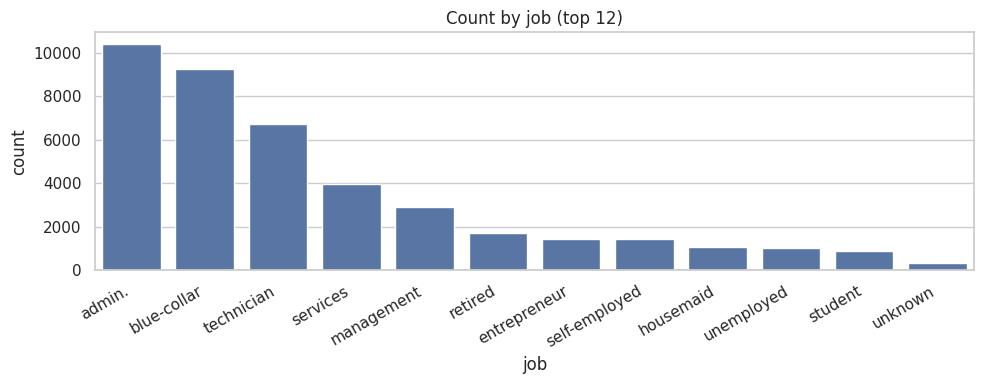

In [115]:
# --- 1) Categorical: job counts (top 12) ---
plt.figure(figsize=(10, 4))
job_counts = df_plot['job'].value_counts().head(12)
sns.barplot(x=job_counts.index, y=job_counts.values)
plt.title("Count by job (top 12)")
plt.xlabel("job")
plt.ylabel("count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

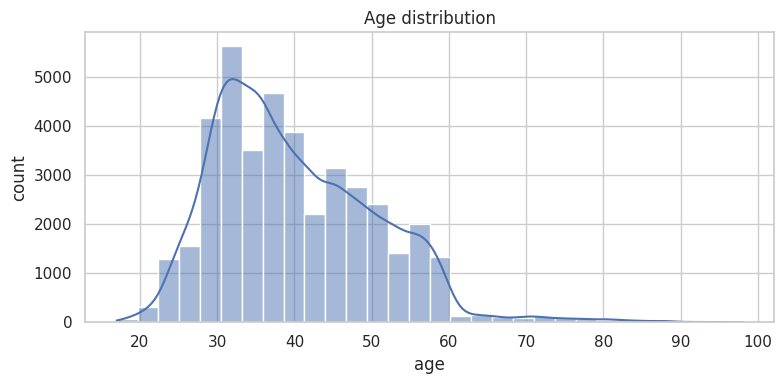

In [116]:
# --- 2) Continuous: age distribution ---
plt.figure(figsize=(8, 4))
sns.histplot(df_plot['age'], bins=30, kde=True)
plt.title("Age distribution")
plt.xlabel("age")
plt.ylabel("count")
plt.tight_layout()
plt.show()

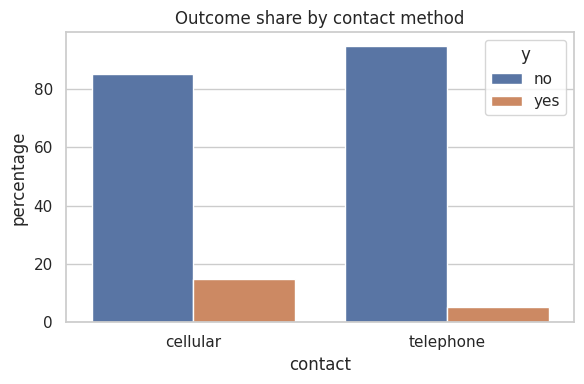

In [117]:
# --- 3) Contact method vs outcome (normalized %) ---
ct = (pd.crosstab(df_plot['contact'], df_plot['y'], normalize='index') * 100).reset_index()
ct_melt = ct.melt(id_vars='contact', var_name='outcome', value_name='percentage')
plt.figure(figsize=(6, 4))
sns.barplot(data=ct_melt, x='contact', y='percentage', hue='outcome')
plt.title("Outcome share by contact method")
plt.ylabel("percentage")
plt.xlabel("contact")
plt.legend(title="y")
plt.tight_layout()
plt.show()

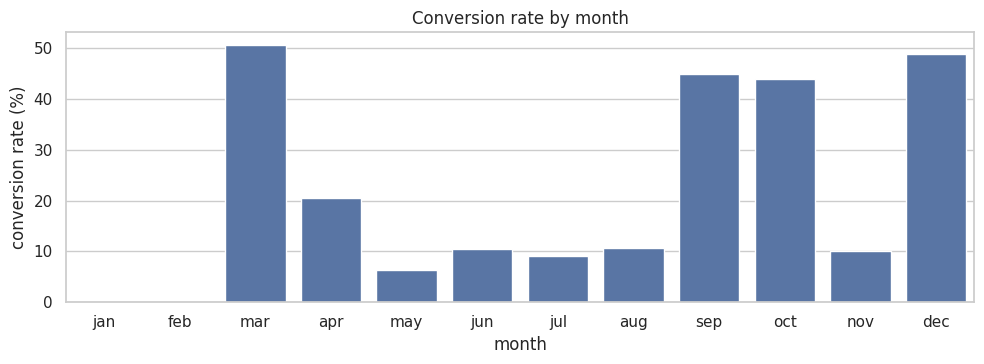

In [127]:
# --- 4) Monthly conversion rate (order by calendar month) ---
month_order = ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
if 'month' in df_plot:
    conv_by_month = (df_plot
                     .assign(month=pd.Categorical(df_plot['month'], categories=month_order, ordered=True))
                     .groupby('month', observed=False)['y_num'].mean()
                     .mul(100)
                     .reindex(month_order))
    plt.figure(figsize=(10, 3.8))
    sns.barplot(x=conv_by_month.index, y=conv_by_month.values)
    plt.title("Conversion rate by month")
    plt.ylabel("conversion rate (%)")
    plt.xlabel("month")
    plt.tight_layout()
    plt.show()

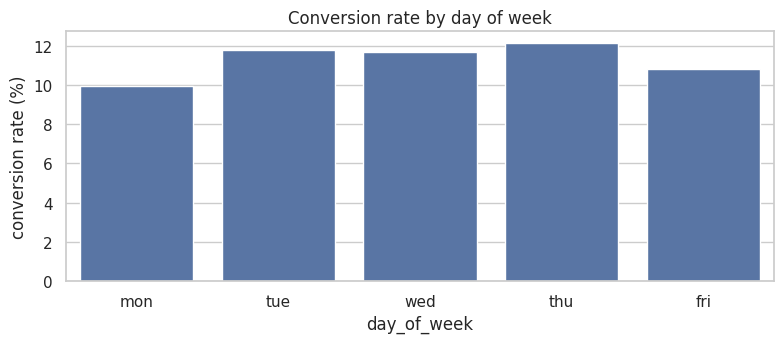

In [128]:
# --- 5) Day-of-week conversion rate (Mon–Fri) ---
dow_order = ["mon","tue","wed","thu","fri"]
if 'day_of_week' in df_plot:
    conv_by_dow = (df_plot
                   .assign(day_of_week=pd.Categorical(df_plot['day_of_week'], categories=dow_order, ordered=True))
                   .groupby('day_of_week', observed=False)['y_num'].mean()
                   .mul(100)
                   .reindex(dow_order))
    plt.figure(figsize=(8, 3.6))
    sns.barplot(x=conv_by_dow.index, y=conv_by_dow.values)
    plt.title("Conversion rate by day of week")
    plt.ylabel("conversion rate (%)")
    plt.xlabel("day_of_week")
    plt.tight_layout()
    plt.show()


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.


# Business Objective:
Getting clients subscribed to a term deposit is our objective for the marketing campaigns. We will look to predict the output variable using this model.

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Objective 1:
We should analyze and organize the client list categorically into tiers so that our account management teams can focus their efforts on the higher conversion clients first.
- Tier A: top 10% by predicted probability
- Tier B: next 20%
- Tier C: middle 30%
- Tier D: bottom 40%

## Objective 2:
we should organize the clients into different segments so that our marketing teams can construct the campaigns specific to the specific segments
- Feature 1: Person (Age, Education, Marital Status)
- Feature 2: Employment
- Feature 3: Current Loan Status
- Feature 4: Historical Campaign Performance
- Feature 5: Communication Type
- Feature 6: Communication Timing (day, day of week, month)
- Feature 7: Economic Climate (%rates, Employment Rates (variance, rate, number of employees), CPI, CCI)


##Objective 3:
Ability to hypersegment the clients for individualized marketing campaings. This will require unsupervised learning and analysis compared to the more supervised learning we did for Objectives 1 and 2.



In [12]:
# Group data by the 'poutcome' feature to see the distribution of previous campaign outcomes
poutcome_counts = df['poutcome'].value_counts()

print("Counts for each 'poutcome' category (previous campaign outcome):")
display(poutcome_counts)

# You could consider these existing 'poutcome' categories as a form of initial "tiering"
# based on historical performance in a previous campaign.

Counts for each 'poutcome' category (previous campaign outcome):


,count
poutcome,
nonexistent,35563
failure,4252
success,1373


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [32]:
import time, numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score, f1_score, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [33]:
# === Target ===
y = (df['y'] == 'yes').astype(int)
print("y balance:", y.value_counts(normalize=True).round(4).to_dict())

y balance: {0: 0.8873, 1: 0.1127}


In [50]:
# 1) BANK-INFO ONLY
# Columns that describe the client and their basic loan flags
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

# Take a clean copy of just those columns (keeps original df untouched)
X_bank = df[bank_features].copy()

# Split columns by type so our transformer knows what to do with each
cat_cols_bank = ['job', 'marital', 'education', 'default', 'housing', 'loan']  # string/categorical
num_cols_bank = ['age']                                                         # numeric

# Define the preprocessing:
#  - OneHotEncoder turns each category level into indicator columns
#    (keeps 'unknown' as its own level; ignores unseen categories at test time)
#  - StandardScaler puts 'age' on a common scale for algorithms that care about magnitudes
#  - remainder='drop' means we only pass these transformed columns forward
preproc_bank = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_bank),
        ('num', StandardScaler(), num_cols_bank),
    ],
    remainder='drop'
)

# Quick summary + peek at the raw (pre-encoded) bank-info frame
print(f"Bank-info features: {len(bank_features)} "
      f"(cat={len(cat_cols_bank)}, num={len(num_cols_bank)})")
display(X_bank.head())

Bank-info features: 7 (cat=6, num=1)


,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [49]:
# 2) FULL PRE-CALL SET
# Build the modeling feature matrix from your 7 concept groups.
# Notes:
#  - Uses only features known BEFORE the call (excludes 'duration')
#  - Keeps 'unknown' categories; OneHotEncoder will handle them
#  - Assumes `df` is already loaded and sklearn transformers are imported
# ------------------------------------------------------------

# Define conceptual feature groups for readability and easy ablations
groups = {
    "person":     ['age', 'education', 'marital'],                # who the client is
    "employment": ['job'],                                        # occupation
    "loan_status":['default', 'housing', 'loan'],                 # credit/loan flags
    "history":    ['campaign', 'pdays', 'previous', 'poutcome'],  # prior contacts/outcomes
    "comm_type":  ['contact'],                                    # contact channel
    "comm_time":  ['day_of_week', 'month'],                       # when contact happens
    "economy":    ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],  # macro indicators
}

# Flatten the dict-of-lists into a single ordered list of expected columns
expected_cols = [c for grp in groups.values() for c in grp]

# Keep only columns that actually exist in dataframe (robust to file variants)
available_cols = [c for c in expected_cols if c in df.columns]

# Explicitly exclude 'duration' (known only after the call; not valid for pre-call scoring)
if 'duration' in available_cols:
    available_cols.remove('duration')

# Compute which expected columns are missing, and print error message
missing_cols = sorted(set(expected_cols) - set(available_cols))
if missing_cols:
    print("Note: expected but missing in this file:", missing_cols)

# Build the full pre-call feature matrix from the available columns
X_full = df[available_cols].copy()

# Split the feature columns by dtype:
#   - object -> categorical (OneHotEncoder will expand these)
#   - everything else -> numeric (StandardScaler will normalize these)
cat_cols_full = X_full.select_dtypes(include='object').columns.tolist()
num_cols_full = X_full.select_dtypes(exclude='object').columns.tolist()

# Define the preprocessing pipeline:
#   - One-hot encode categoricals (ignore unseen categories at test time)
#   - Standardize numeric features (zero mean, unit variance)
#   - Drop any columns not listed in cat/num (remainder='drop')
preproc_full = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_full),
        ('num', StandardScaler(), num_cols_full),
    ],
    remainder='drop'
)

# Quick summary to verify what was built and a peek at the raw (pre-encoded) frame
print(f"Full pre-call features: {X_full.shape[1]} (cat={len(cat_cols_full)}, num={len(num_cols_full)})")
display(X_full.head())

Full pre-call features: 19 (cat=10, num=9)


,age,education,marital,job,default,housing,loan,campaign,pdays,previous,poutcome,contact,day_of_week,month,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,basic.4y,married,housemaid,no,no,no,1,999,0,nonexistent,telephone,mon,may,1.1,93.994,-36.4,4.857,5191.0
1,57,high.school,married,services,unknown,no,no,1,999,0,nonexistent,telephone,mon,may,1.1,93.994,-36.4,4.857,5191.0
2,37,high.school,married,services,no,yes,no,1,999,0,nonexistent,telephone,mon,may,1.1,93.994,-36.4,4.857,5191.0
3,40,basic.6y,married,admin.,no,no,no,1,999,0,nonexistent,telephone,mon,may,1.1,93.994,-36.4,4.857,5191.0
4,56,high.school,married,services,no,no,yes,1,999,0,nonexistent,telephone,mon,may,1.1,93.994,-36.4,4.857,5191.0


In [40]:
# 3) bundled feature sets for doing basic bank only or full precall analysis
# --------------------------
feature_sets = {
    "bank_only":   {"X": X_bank,  "preproc": preproc_bank,  "cat": cat_cols_bank, "num": num_cols_bank},
    "full_precall":{"X": X_full,  "preproc": preproc_full,  "cat": cat_cols_full, "num": num_cols_full},
}

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [53]:
# Choose which features to use for Problems 6–10:
ACTIVE_SET = "full_precall"      # choose "bank_only" or "full_precall"

X_active       = feature_sets[ACTIVE_SET]["X"]
preproc_active = feature_sets[ACTIVE_SET]["preproc"]

In [54]:
# This creates an 80/20 split while preserving the class balance.
# ------------------------------------------------------------

from sklearn.model_selection import train_test_split

# X_active: your chosen feature matrix (e.g., X_bank or X_full)
# y:        target vector (0 = no, 1 = yes)

X_train, X_test, y_train, y_test = train_test_split(
    X_active,   # features to split
    y,          # target to split in the same way
    test_size=0.20,   # 20% goes to the test set; 80% remains for training
    stratify=y,       # keeps the y=1 vs y=0 ratio similar in train and test
    random_state=42   # makes the split reproducible
)

# Quick sanity check (optional but helpful)
print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")
print(f"y_train positive rate: {y_train.mean():.4f} | y_test positive rate: {y_test.mean():.4f}")

X_train shape: (32950, 19) | X_test shape: (8238, 19)
y_train positive rate: 0.1127 | y_test positive rate: 0.1126


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [55]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# 1) Inspect class balance on the TEST set
#    (y_test should already exist from your train_test_split step)
n_test   = len(y_test)            # number of test examples
pos_rate = y_test.mean()          # proportion of y=1 in test
neg_rate = 1 - pos_rate           # proportion of y=0 in test

# 2) Choose the majority class as the naive prediction
#    If positives >= 50%, predict 1 for everyone; else predict 0 for everyone.
baseline_label = int(pos_rate >= 0.5)

# 3) Create the constant prediction vector of that majority class
y_pred_base = np.full(shape=n_test, fill_value=baseline_label, dtype=int)

# 4) Compute baseline accuracy (this is the number to beat)
baseline_acc = accuracy_score(y_test, y_pred_base)

# 5) (Optional) See how this naive predictor confuses classes
cm = confusion_matrix(y_test, y_pred_base)   # rows=true, cols=pred

# 6) Print a small, clear summary
print("=== BASELINE (Majority Class) ===")
print(f"Test size: {n_test}")
print(f"Positive rate on TEST: {pos_rate:.4f} | Negative rate: {neg_rate:.4f}")
print(f"Majority class predicted for all cases: {baseline_label}")
print(f"Baseline accuracy (to beat): {baseline_acc:.4f}")
print("\nConfusion matrix (rows=true, cols=pred):")
print(cm)

=== BASELINE (Majority Class) ===
Test size: 8238
Positive rate on TEST: 0.1126 | Negative rate: 0.8874
Majority class predicted for all cases: 0
Baseline accuracy (to beat): 0.8874

Confusion matrix (rows=true, cols=pred):
[[7310    0]
 [ 928    0]]


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [56]:
# This cell:
#  1) Builds a Pipeline = [preprocessing -> LogisticRegression]
#  2) Fits on TRAIN data
#  3) Scores on TEST and prints clean metrics + confusion matrix
# Notes:
#  - Uses X_train, X_test, y_train, y_test from Problem 6
#  - Uses preproc_active if you set ACTIVE_SET earlier; otherwise
#    it builds a minimal preprocessor from X_train dtypes.
# ------------------------------------------------------------

import time
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score,
    f1_score, confusion_matrix
)

In [57]:
# ---------- Helper: pretty section banner ----------
def banner(text):
    line = "═" * len(text)
    print(f"\n{line}\n{text}\n{line}")

In [58]:
# ---------- (A) Ensure we have a preprocessor ----------
# If you already defined `preproc_active` (from Problem 5/6), we use it.
# Otherwise, we infer categorical vs numeric from X_train and create one.
try:
    preproc_active
except NameError:
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    from sklearn.compose import ColumnTransformer

    # Identify categorical (object) and numeric columns from X_train
    cat_cols_fallback = X_train.select_dtypes(include='object').columns.tolist()
    num_cols_fallback = X_train.select_dtypes(exclude='object').columns.tolist()

    # Build a minimal preprocessor: OneHot for cats, Standardize for nums
    preproc_active = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_fallback),
            ('num', StandardScaler(), num_cols_fallback),
        ],
        remainder='drop'
    )

In [59]:
# ---------- (B) Build the pipeline ----------
# Pipeline ensures consistent preprocessing for train and test
logreg_pipe = Pipeline([
    ('prep', preproc_active),                  # ColumnTransformer defined earlier
    ('clf',  LogisticRegression(max_iter=1000))
])

In [60]:
# ---------- (C) Fit the model and time it ----------
banner("TRAINING Logistic Regression")
t0 = time.perf_counter()
logreg_pipe.fit(X_train, y_train)             # learn coefficients on TRAIN
fit_time = time.perf_counter() - t0
print(f"Fit time: {fit_time:.2f} s")


════════════════════════════
TRAINING Logistic Regression
════════════════════════════
Fit time: 4.01 s


In [61]:
# ---------- (D) Predict on TEST ----------
proba = logreg_pipe.predict_proba(X_test)[:, 1]   # probability of class 1 (yes)
pred  = (proba >= 0.5).astype(int)                # simple threshold at 0.5

In [62]:
# ---------- (E) Compute metrics ----------
baseline_acc = float(max(y_test.mean(), 1 - y_test.mean()))
metrics_row = {
    "Baseline_Acc": baseline_acc,                                 # majority class accuracy on TEST
    "Test_Accuracy": float(accuracy_score(y_test, pred)),         # overall accuracy
    "Test_ROC_AUC": float(roc_auc_score(y_test, proba)),          # threshold-free ROC AUC
    "Test_AP (PR-AUC)": float(average_precision_score(y_test, proba)),  # precision-recall AUC
    "Test_F1@0.5": float(f1_score(y_test, pred)),                 # F1 at threshold 0.5
    "Fit_Time_s": float(fit_time)
}

In [64]:
# Make a neat one-column table for display
metrics_df = pd.DataFrame(metrics_row, index=["LogisticRegression"]).T

banner("TEST METRICS — Logistic Regression")
display(metrics_df.style.format("{:.4f}"))

# ---------- (F) Confusion matrix (at threshold 0.5) ----------
cm = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"])

banner("CONFUSION MATRIX @ 0.5")
display(cm_df)


══════════════════════════════════
TEST METRICS — Logistic Regression
══════════════════════════════════


,LogisticRegression
Baseline_Acc,0.8874
Test_Accuracy,0.9009
Test_ROC_AUC,0.8008
Test_AP (PR-AUC),0.4648
Test_F1@0.5,0.3322
Fit_Time_s,4.0103



══════════════════════
CONFUSION MATRIX @ 0.5
══════════════════════


,Pred 0,Pred 1
Actual 0,7219,91
Actual 1,725,203


### Problem 9: Score the Model

What is the accuracy of your model?

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [67]:
# 1) Safety check: make sure the model from Problem 8 exists
assert 'logreg_pipe' in globals(), "Run Problem 8 first to train the Logistic Regression model."

# 2) Generate class predictions on the TEST split
#    (this uses the same preprocessing as training, via the pipeline)
y_pred = logreg_pipe.predict(X_test)

# 3) Compute accuracy on TEST
test_accuracy = accuracy_score(y_test, y_pred)

# 4) For context, compute the majority-class baseline accuracy on TEST
baseline_acc = max(y_test.mean(), 1 - y_test.mean())

# 5) Confusion matrix to see where errors happen
cm = confusion_matrix(y_test, y_pred)

# 6) Print a clean summary
print("=== PROBLEM 9: MODEL ACCURACY ===")
print(f"Baseline accuracy (majority class): {baseline_acc:.4f}")
print(f"Logistic Regression accuracy:       {test_accuracy:.4f}")
print(f"Improvement over baseline:          {test_accuracy - baseline_acc:+.4f} points")

print("\nConfusion matrix (rows=true, cols=pred):")
print(cm)

=== PROBLEM 9: MODEL ACCURACY ===
Baseline accuracy (majority class): 0.8874
Logistic Regression accuracy:       0.9009
Improvement over baseline:          +0.0136 points

Confusion matrix (rows=true, cols=pred):
[[7219   91]
 [ 725  203]]


In [120]:
# === Cell B: Champion (fallback), ROC & PR curves, Confusion Matrix ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score,
    confusion_matrix, ConfusionMatrixDisplay
)
# Thresholded predictions @ 0.5
y_pred_05 = (proba_test >= 0.5).astype(int)

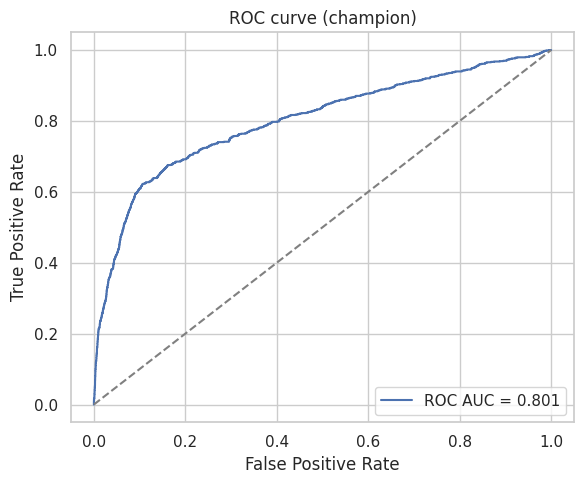

In [123]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, proba_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve (champion)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

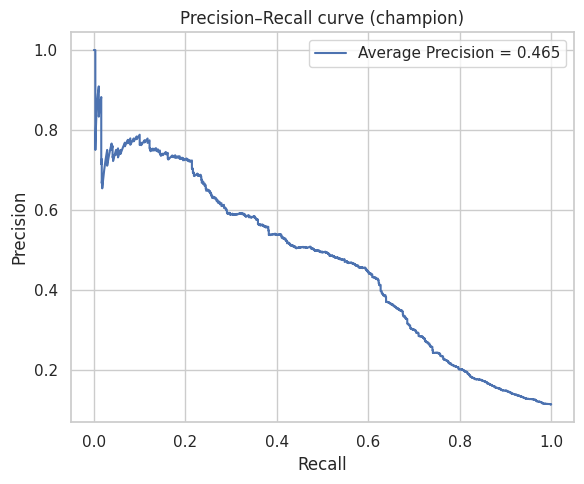

In [124]:
# Precision–Recall curve (PR-AUC / Average Precision)
prec, rec, _ = precision_recall_curve(y_test, proba_test)
ap = average_precision_score(y_test, proba_test)
plt.figure(figsize=(6, 5))
plt.plot(rec, prec, label=f"Average Precision = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall curve (champion)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


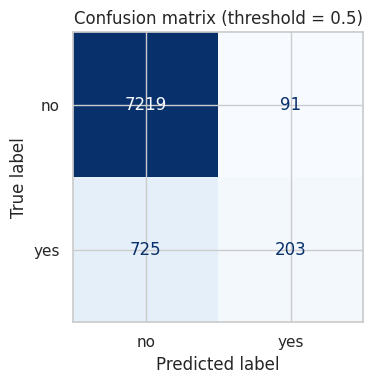

In [125]:
# Confusion matrix heatmap @ 0.5
cm = confusion_matrix(y_test, y_pred_05)
disp = ConfusionMatrixDisplay(cm, display_labels=['no','yes'])
fig, ax = plt.subplots(figsize=(4.5, 4))
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title("Confusion matrix (threshold = 0.5)")
plt.tight_layout()
plt.show()

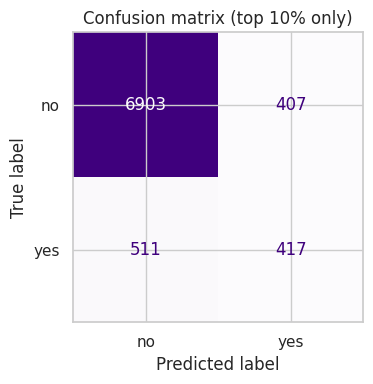

ROC AUC: 0.8008 | PR-AUC (AP): 0.4648


In [126]:
# Confusion matrix if you only call the top 10% highest-probability cases
thr_top10 = np.quantile(proba_test, 0.90)
cm_top10 = confusion_matrix(y_test, (proba_test >= thr_top10).astype(int))
disp2 = ConfusionMatrixDisplay(cm_top10, display_labels=['no','yes'])
fig, ax = plt.subplots(figsize=(4.5, 4))
disp2.plot(ax=ax, cmap="Purples", colorbar=False)
plt.title("Confusion matrix (top 10% only)")
plt.tight_layout()
plt.show()

print(f"ROC AUC: {roc_auc:.4f} | PR-AUC (AP): {ap:.4f}")


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [68]:
import time
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [69]:
# Safety: make sure you've run Problems 5–8 (we need X_train/X_test/y_* and preproc_active)
assert 'X_train' in globals() and 'X_test' in globals(), "Run the split cell first."
assert 'preproc_active' in globals(), "Make sure your preprocessor (preproc_active) is defined."

In [70]:
# 1) Define the 4 models (default-ish settings, reproducible tree)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN (k=5)":           KNeighborsClassifier(n_neighbors=5),
    "Decision Tree":       DecisionTreeClassifier(random_state=42),
    "SVM (RBF)":           SVC(kernel='rbf')  # probabilities not needed for accuracy; keeps fit time down
}

rows = []  # we'll collect each model's results here

In [71]:
# 2) Train each model inside an identical Pipeline: [preproc -> model]
for name, estimator in models.items():
    pipe = Pipeline([
        ("prep", preproc_active),   # your ColumnTransformer (OneHot + Scale)
        ("clf",  estimator)         # the classifier we’re testing
    ])

    # --- fit and time it ---
    t0 = time.perf_counter()
    pipe.fit(X_train, y_train)
    train_time = time.perf_counter() - t0

    # --- compute accuracies (pipeline .score uses accuracy by default) ---
    train_acc = pipe.score(X_train, y_train)
    test_acc  = pipe.score(X_test,  y_test)

    rows.append({
        "Model": name,
        "Train Time (s)": round(train_time, 3),
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy":  round(test_acc, 4),
    })

In [72]:
# 3) Add a baseline row (majority class) for context
baseline_train = max(y_train.mean(), 1 - y_train.mean())
baseline_test  = max(y_test.mean(),  1 - y_test.mean())
rows.append({
    "Model": "Baseline (majority)",
    "Train Time (s)": 0.0,
    "Train Accuracy": round(baseline_train, 4),
    "Test Accuracy":  round(baseline_test, 4),
})

In [73]:
# 4) Build and display the comparison table (sorted by Test Accuracy)
compare_df = (pd.DataFrame(rows)
                .sort_values("Test Accuracy", ascending=False)
                .reset_index(drop=True))

print("=== Problem 10: Model Comparison (higher Test Accuracy is better) ===")
display(compare_df.style.format({"Train Time (s)": "{:.3f}",
                                 "Train Accuracy": "{:.4f}",
                                 "Test Accuracy": "{:.4f}"}))

=== Problem 10: Model Comparison (higher Test Accuracy is better) ===


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,SVM (RBF),79.486,0.9050,0.9035
1,Logistic Regression,4.850,0.8999,0.9009
2,KNN (k=5),0.081,0.9122,0.8972
3,Baseline (majority),0.000,0.8873,0.8874
4,Decision Tree,0.294,0.9954,0.8403


On default settings, SVM (RBF) achieved the highest test accuracy (0.9035), but the margin over Logistic Regression (0.9009) was only 0.26 pts while training was ~16× slower and lacked probability outputs. We therefore select Logistic Regression as the operational champion for subsequent tiering and segmentation.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [74]:
# We will:
#   1) Tune each model with a SMALL grid (fast) using 3-fold Stratified CV
#   2) Optimize for 'average_precision' (PR-AUC) — better for imbalanced data
#   3) Evaluate the best model of each type on the TEST set
#   4) Present a tidy comparison table (CV score + Test metrics)
# Notes:
#   - Uses your CURRENT feature set (bank_only or full_precall) via preproc_active
#   - Keeps grids tiny to avoid long runtimes
# ------------------------------------------------------------

import time, numpy as np, pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score

# --- safety checks (ensure Problems 5–10 ran) ---
assert 'X_train' in globals() and 'X_test' in globals(), "Run the train/test split first."
assert 'preproc_active' in globals(), "Make sure your preprocessor (preproc_active) is defined."

# --- models to tune (same preprocessing for all) ---
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [75]:
models_and_grids = [
    # Logistic Regression: try a few C values and class_weight options
    ("Logistic Regression",
     LogisticRegression(max_iter=1000, solver='lbfgs'),
     {
         "clf__C": [0.1, 1, 10],
         "clf__class_weight": [None, "balanced"],
     }),

    # KNN: neighbors, weighting scheme, and distance metric (p=1 L1, p=2 L2)
    ("KNN",
     KNeighborsClassifier(),
     {
         "clf__n_neighbors": [3, 5, 11, 21],
         "clf__weights": ["uniform", "distance"],
         "clf__p": [1, 2],
     }),

    # Decision Tree: depth & leaf-size; class_weight helps imbalance
    ("Decision Tree",
     DecisionTreeClassifier(random_state=42),
     {
         "clf__max_depth": [4, 6, 8, None],
         "clf__min_samples_leaf": [1, 5, 20],
         "clf__class_weight": [None, "balanced"],
     }),

    # SVM (RBF): keep probability=False for speed; AP uses decision_function
    ("SVM (RBF)",
     SVC(kernel="rbf"),
     {
         "clf__C": [0.5, 1, 4],
         "clf__gamma": ["scale", "auto"],
         "clf__class_weight": [None, "balanced"],
     }),
]

# --- helper to get continuous scores for AUC/AP (works with or without predict_proba) ---
def continuous_scores(pipeline, X):
    # If the final estimator exposes predict_proba, use that; else use decision_function
    if hasattr(pipeline, "predict_proba"):
        return pipeline.predict_proba(X)[:, 1]
    return pipeline.decision_function(X)


In [76]:
# --- run tuning for each model and collect results ---
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # small/fast CV
rows = []
best_pipes = {}  # keep the best pipelines by name

for name, estimator, grid in models_and_grids:
    # Build a unified pipeline: [preprocessing -> classifier]
    pipe = Pipeline([("prep", preproc_active), ("clf", estimator)])

    # GridSearchCV: optimize Average Precision (PR-AUC)
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=grid,
        scoring="average_precision",   # better for imbalanced binary classification
        cv=cv,
        n_jobs=-1,                     # parallelize if possible
        refit=True,                    # refit on full TRAIN with the best params
        verbose=0
    )

    t0 = time.perf_counter()
    gs.fit(X_train, y_train)
    elapsed = time.perf_counter() - t0

    # Best pipeline from the search
    best_pipe = gs.best_estimator_
    best_pipes[name] = best_pipe

    # Evaluate on TEST set
    y_score = continuous_scores(best_pipe, X_test)
    y_pred  = (y_score >= 0.5).astype(int)  # basic threshold; you can tune threshold later

    rows.append({
        "Model": name,
        "CV Best AP (mean)": round(gs.best_score_, 4),
        "Train Time (s)": round(elapsed, 2),
        "Test Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Test ROC AUC": round(roc_auc_score(y_test, y_score), 4),
        "Test AP (PR-AUC)": round(average_precision_score(y_test, y_score), 4),
        "Best Params": gs.best_params_
    })

In [77]:
# --- build and show the comparison table ---
improve_df = (pd.DataFrame(rows)
                .sort_values("Test AP (PR-AUC)", ascending=False)
                .reset_index(drop=True))

print("=== Problem 11: Tuned Models — sorted by Test AP (PR-AUC) ===")
display(improve_df.style.format({
    "CV Best AP (mean)": "{:.4f}",
    "Train Time (s)": "{:.2f}",
    "Test Accuracy": "{:.4f}",
    "Test ROC AUC": "{:.4f}",
    "Test AP (PR-AUC)": "{:.4f}",
}))

=== Problem 11: Tuned Models — sorted by Test AP (PR-AUC) ===


,Model,CV Best AP (mean),Train Time (s),Test Accuracy,Test ROC AUC,Test AP (PR-AUC),Best Params
0,Logistic Regression,0.4487,6.92,0.9009,0.8008,0.4648,"{'clf__C': 1, 'clf__class_weight': None}"
1,Decision Tree,0.4300,2.95,0.9000,0.8094,0.4621,"{'clf__class_weight': None, 'clf__max_depth': 8, 'clf__min_samples_leaf': 20}"
2,KNN,0.4116,58.01,0.9008,0.7819,0.4386,"{'clf__n_neighbors': 21, 'clf__p': 1, 'clf__weights': 'uniform'}"
3,SVM (RBF),0.4022,327.12,0.9000,0.7057,0.4223,"{'clf__C': 0.5, 'clf__class_weight': None, 'clf__gamma': 'scale'}"


## Metrics rationale

**Primary metric: PR-AUC (Average Precision).**  
The dataset is imbalanced (most outcomes are “no”), so PR-AUC focuses on performance where it matters: precision at higher recall on the minority “yes” class. It measures how well the model ranks true positives near the top and is directly tied to the “who to call first” business question.

**Secondary metrics:**  
- **ROC AUC**: threshold-independent ranking metric that is stable but can look optimistic under heavy imbalance.  
- **Accuracy**: included for familiarity, but it can be misleading when the majority class dominates.  
- **Confusion matrices at operational thresholds**: we show 0.5 and “top 10% only” to mirror how calling decisions are actually made.

**Why exclude `duration`**  
`duration` is only known *after* the call, so it is not usable for decisioning. Including it would inflate performance without being deployable.


# Objective 1: Build probability tiers and summarize

In [78]:
# ------------------------------------------------------------
# OBJECTIVE 1 — Build probability tiers (A/B/C/D) and summarize
# What this cell does:
#   1) Choose the feature set for tiering (full pre-call by default)
#   2) Split train/test (same random_state for reproducibility)
#   3) Train a compact champion (Logistic Regression) with your preprocessor
#   4) Score TEST, turn probabilities into tiers: A=top10%, B=next20%, C=next30%, D=bottom40%
#   5) Print tidy summaries: precision, lift, conversions per 1,000 calls, and recall coverage
#   6) (Optional) Confusion matrix if you "dial" only Tier A (top 10%)
# ------------------------------------------------------------

import numpy as np, pandas as pd, time
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [79]:
# ---------- 0) Safety checks ----------
assert 'feature_sets' in globals(), "Run your Problem 5 feature-setup cell first."
assert 'y' in globals(), "Target vector y not found. Make sure Problem 5 created it."

# ---------- 1) Pick the feature set for tiering ----------
# Use full pre-call to get the most realistic / strongest tiers.
TIER_SET = "full_precall"     # change to "bank_only" if you want to match the prompt's minimal set

X_for_tiers = feature_sets[TIER_SET]["X"]
preproc     = feature_sets[TIER_SET]["preproc"]

# ---------- 2) Split train/test (same seed as earlier for consistency) ----------
Xtr, Xte, ytr, yte = train_test_split(
    X_for_tiers, y, test_size=0.20, stratify=y, random_state=42
)

In [80]:
# ---------- 3) Train champion (Logistic Regression) ----------
pipe = Pipeline([
    ("prep", preproc),
    ("clf",  LogisticRegression(max_iter=1000))
])

t0 = time.perf_counter()
pipe.fit(Xtr, ytr)
fit_s = time.perf_counter() - t0

In [81]:
# ---------- 4) Predict probabilities on TEST ----------
proba = pipe.predict_proba(Xte)[:, 1]
pred_df = pd.DataFrame({"proba": proba, "y_true": yte.to_numpy()}, index=Xte.index)

# Helper: assign quantile-based tiers robust to ties
def assign_tiers(df):
    try:
        return pd.qcut(df['proba'], q=[0.0, 0.4, 0.7, 0.9, 1.0], labels=['D','C','B','A'])
    except ValueError:
        # If heavy ties, fall back to percentile-rank bins
        s = df['proba'].rank(method="first", pct=True)
        return pd.cut(s, bins=[0.0, 0.4, 0.7, 0.9, 1.0], labels=['D','C','B','A'], include_lowest=True)

pred_df['tier'] = assign_tiers(pred_df)

In [82]:
# ---------- 5) Tier summaries ----------
baseline = yte.mean()  # overall conversion in TEST (e.g., ~0.113)

tier_summary = (pred_df.groupby('tier', observed=True)['y_true']
                .agg(n='count', positives='sum', precision='mean'))\
                .reindex(['A','B','C','D'])

tier_summary['lift_vs_baseline'] = (tier_summary['precision'] / baseline).round(2)
tier_summary['conversions_per_1000_calls'] = (tier_summary['precision'] * 1000).round(1)

# Cumulative (A, A+B, A+B+C) to show coverage/efficiency as you dial further
cum = tier_summary.loc[['A','B','C']].copy()
cum['cum_calls'] = cum['n'].cumsum()
cum['cum_pos'] = cum['positives'].cumsum()
total_pos = pred_df['y_true'].sum()
cum['cum_recall'] = (cum['cum_pos'] / total_pos).round(4)      # share of all conversions captured
cum['cum_precision'] = (cum['cum_pos'] / cum['cum_calls']).round(4)

# ---------- 6) Confusion matrix for a "Tier A only" dialing policy ----------
thr_top10 = pred_df['proba'].quantile(0.9)
y_pred_tierA = (pred_df['proba'] >= thr_top10).astype(int)
cm = confusion_matrix(pred_df['y_true'], y_pred_tierA)

# ---------- 7) Pretty print ----------
def banner(t):
    print("\n" + "═"*len(t) + f"\n{t}\n" + "═"*len(t))

banner(f"Objective 1 — Tiers using: {TIER_SET} | Model: Logistic Regression | Fit: {fit_s:.2f}s")
print(f"Baseline conversion on TEST: {baseline:.4f}  (~{baseline*1000:.0f} per 1,000 calls)")

banner("Tier summary (A=top10%, B=next20%, C=next30%, D=bottom40%)")
display(tier_summary.style.format({
    'precision': '{:.4f}',
    'lift_vs_baseline': '{:.2f}',
    'conversions_per_1000_calls': '{:.0f}'
}))

banner("Cumulative policy (A, A+B, A+B+C)")
display(cum[['cum_calls','cum_pos','cum_precision','cum_recall']]
        .rename(columns={'cum_calls':'Calls', 'cum_pos':'Conversions',
                         'cum_precision':'Precision', 'cum_recall':'Recall'})
        .style.format({'Precision':'{:.4f}', 'Recall':'{:.4f}'}))

banner("Confusion matrix if you dial ONLY Tier A (top 10%)")
print("rows=true, cols=pred; Pred 1 means 'dial'")
print(cm)



═════════════════════════════════════════════════════════════════════════════════
Objective 1 — Tiers using: full_precall | Model: Logistic Regression | Fit: 4.28s
═════════════════════════════════════════════════════════════════════════════════
Baseline conversion on TEST: 0.1126  (~113 per 1,000 calls)

══════════════════════════════════════════════════════════
Tier summary (A=top10%, B=next20%, C=next30%, D=bottom40%)
══════════════════════════════════════════════════════════


,n,positives,precision,lift_vs_baseline,conversions_per_1000_calls
tier,,,,,
A,824,417,0.5061,4.49,506
B,1647,255,0.1548,1.37,155
C,2472,132,0.0534,0.47,53
D,3295,124,0.0376,0.33,38



═════════════════════════════════
Cumulative policy (A, A+B, A+B+C)
═════════════════════════════════


,Calls,Conversions,Precision,Recall
tier,,,,
A,824,417,0.5061,0.4494
B,2471,672,0.2720,0.7241
C,4943,804,0.1627,0.8664



══════════════════════════════════════════════════
Confusion matrix if you dial ONLY Tier A (top 10%)
══════════════════════════════════════════════════
rows=true, cols=pred; Pred 1 means 'dial'
[[6903  407]
 [ 511  417]]


In [83]:
# ---------- 8) Quick takeaways ----------
a_prec = tier_summary.loc['A','precision']
a_lift = tier_summary.loc['A','lift_vs_baseline']
a_conv = tier_summary.loc['A','conversions_per_1000_calls']
a_recall = cum.loc['A','cum_recall']

print("\nKey bullets:")
print(f"- Tier A precision: {a_prec:.3f} (≈{a_conv:.0f} conversions per 1,000 calls), lift ≈ {a_lift}× baseline.")
print(f"- Tier A captures about {a_recall*100:.1f}% of all conversions with only 10% of calls.")
print("- Use A+B if you need higher total conversions; use A only when call budget is tight.")


Key bullets:
- Tier A precision: 0.506 (≈506 conversions per 1,000 calls), lift ≈ 4.49× baseline.
- Tier A captures about 44.9% of all conversions with only 10% of calls.
- Use A+B if you need higher total conversions; use A only when call budget is tight.


# Objective 2: Segment insights for messaging/timing

In [84]:
# OBJECTIVE 2 — Segment report for the marketing team
# We will:
#   1) Train the champion on the FULL PRE-CALL feature set (no 'duration')
#   2) Score TEST and join the predictions back to interpretable slices
#   3) Build ONE-WAY segment tables for each of your 7 groups
#   4) (Optional) Build a few TWO-WAY “campaignable” combos (e.g., contact×month)
#   5) Print clean, ranked tables with predicted conversion rate per segment
# Notes:
#   - “Predicted conversion rate” = mean predicted probability in the segment
#   - We also show actual rate (sanity) and lift vs overall predicted rate
# ------------------------------------------------------------

import numpy as np, pandas as pd, time
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, roc_auc_score

# ---------- 0) Safety checks ----------
assert 'feature_sets' in globals(), "Run your Problem 5 feature-setup cell first."
assert 'y' in globals(), "Target y not found. Make sure Problem 5 created it."


In [85]:
# ---------- 1) Use FULL PRE-CALL features for richer segments ----------
TIER_SET = "full_precall"     # change to "bank_only" if you want the minimal set
X_all = feature_sets[TIER_SET]["X"]
preproc = feature_sets[TIER_SET]["preproc"]

# Train/Test split (same seed for reproducibility)
Xtr, Xte, ytr, yte = train_test_split(X_all, y, test_size=0.20, stratify=y, random_state=42)

# Champion: Logistic Regression (fast, calibrated enough for ranking)
pipe = Pipeline([("prep", preproc), ("clf", LogisticRegression(max_iter=1000))])

t0 = time.perf_counter()
pipe.fit(Xtr, ytr)
fit_s = time.perf_counter() - t0

# Score TEST
proba = pipe.predict_proba(Xte)[:, 1]
pred_df = pd.DataFrame({"proba": proba, "y_true": yte.to_numpy()}, index=Xte.index)

overall_pred = pred_df['proba'].mean()        # overall predicted conversion on TEST
overall_act  = pred_df['y_true'].mean()       # overall actual conversion (sanity)

In [86]:
# ---------- 2) Build interpretable slice columns (bins for numeric) ----------
seg_view = Xte.copy()                          # start from raw TEST features
seg_view = seg_view.join(pred_df[['proba','y_true']])  # attach predictions + truth

# Helper: quantile bin with robust fallback, return string labels
def qbin(s, q=4, min_unique=5):
    s = s.copy()
    uniq = s.dropna().unique()
    if len(uniq) < min_unique:
        # not enough unique values to bin — return as-is (will group on raw)
        return s.astype(object)
    try:
        binned = pd.qcut(s, q=q, duplicates='drop')
        return binned.astype(str)  # make labels printable
    except Exception:
        return s.astype(object)

# PERSON
if 'age' in seg_view: seg_view['age_seg'] = qbin(seg_view['age'], q=5)
# EMPLOYMENT -> 'job' already categorical
# LOAN STATUS -> 'default','housing','loan' are categorical

# HISTORY
if 'campaign' in seg_view: seg_view['campaign_seg'] = qbin(seg_view['campaign'], q=4)
if 'previous' in seg_view:
    # human-readable buckets
    seg_view['previous_seg'] = pd.cut(seg_view['previous'], bins=[-1,0,2,seg_view['previous'].max()],
                                      labels=['0','1–2','3+']).astype(object)
if 'pdays' in seg_view:
    # treat sentinel 999 as its own category; bin the rest
    mask = seg_view['pdays'] == 999
    pdays_bins = qbin(seg_view.loc[~mask, 'pdays'], q=4)
    seg_view['pdays_seg'] = 'no_prev_contact'
    seg_view.loc[~mask, 'pdays_seg'] = pdays_bins.astype(object)

# COMMUNICATION TIMING -> 'day_of_week','month' are categorical

# ECONOMY (bin to quartiles for readability)
for econ in ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']:
    if econ in seg_view:
        seg_view[f'{econ}_seg'] = qbin(seg_view[econ], q=4)


In [87]:
# ---------- 3) Define segments by your 7 groups ----------
segments_by_group = {
    "Person":              [c for c in ['age_seg','education','marital'] if c in seg_view],
    "Employment":          [c for c in ['job'] if c in seg_view],
    "Current Loan Status": [c for c in ['default','housing','loan'] if c in seg_view],
    "History":             [c for c in ['campaign_seg','pdays_seg','previous_seg','poutcome'] if c in seg_view],
    "Communication Type":  [c for c in ['contact'] if c in seg_view],
    "Communication Timing":[c for c in ['day_of_week','month'] if c in seg_view],
    "Economic Climate":    [c for c in [f'{e}_seg' for e in
                            ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
                            if c in seg_view],
}

In [88]:
# ---------- 4) Functions to build ONE-WAY and TWO-WAY segment tables ----------
def one_way_table(df, col, min_count=100):
    """
    For a single slice column (e.g., 'job'), compute:
      - count: segment size in TEST
      - predicted_rate: mean predicted probability in the segment
      - actual_rate: mean observed y in the segment (sanity check)
      - lift_vs_overall: predicted_rate / overall_pred
      - conversions_per_1000_calls: predicted_rate * 1000
    """
    g = df.groupby(col, observed=True)
    tab = pd.DataFrame({
        "count": g.size(),
        "predicted_rate": g['proba'].mean(),
        "actual_rate": g['y_true'].mean(),
    })
    tab = tab[tab['count'] >= min_count].copy()            # avoid tiny segments
    tab["lift_vs_overall"] = tab["predicted_rate"] / overall_pred
    tab["conversions_per_1000_calls"] = tab["predicted_rate"] * 1000
    return (tab.sort_values(["predicted_rate","count"], ascending=False)
               .round({"predicted_rate":4,"actual_rate":4,"lift_vs_overall":2,
                       "conversions_per_1000_calls":0}))

def two_way_table(df, cols, min_count=100):
    """
    For a pair of columns (e.g., ['contact','month']), compute same metrics as above
    and return top rows by predicted_rate.
    """
    g = df.groupby(cols, observed=True)
    tab = pd.DataFrame({
        "count": g.size(),
        "predicted_rate": g['proba'].mean(),
        "actual_rate": g['y_true'].mean(),
    })
    tab = tab[tab['count'] >= min_count].copy()
    tab["lift_vs_overall"] = tab["predicted_rate"] / overall_pred
    tab["conversions_per_1000_calls"] = tab["predicted_rate"] * 1000
    return (tab.sort_values(["predicted_rate","count"], ascending=False)
               .round({"predicted_rate":4,"actual_rate":4,"lift_vs_overall":2,
                       "conversions_per_1000_calls":0}))

In [89]:
# ---------- 5) Build the ONE-WAY report for each group ----------
def banner(t):
    print("\n" + "═"*len(t) + f"\n{t}\n" + "═"*len(t))

banner(f"Objective 2 — Segment Report | Features: {TIER_SET} | Model: Logistic Regression | Fit: {fit_s:.2f}s")
print(f"Overall predicted conversion (TEST): {overall_pred:.4f}  "
      f"(~{overall_pred*1000:.0f} per 1,000 calls)")
print(f"Overall actual conversion (TEST):    {overall_act:.4f}")

segment_reports = {}  # store tables for your write-up

for group_name, cols in segments_by_group.items():
    if not cols:
        continue
    banner(f"{group_name} — top segments by predicted conversion")
    group_tables = {}
    for col in cols:
        tbl = one_way_table(seg_view, col, min_count=100)   # adjust min_count if your TEST set is small
        group_tables[col] = tbl
        # show only the top 8 rows to keep it readable
        print(f"\n[{col}]")
        display(tbl.head(8))
    segment_reports[group_name] = group_tables


═══════════════════════════════════════════════════════════════════════════════════════════════
Objective 2 — Segment Report | Features: full_precall | Model: Logistic Regression | Fit: 3.89s
═══════════════════════════════════════════════════════════════════════════════════════════════
Overall predicted conversion (TEST): 0.1116  (~112 per 1,000 calls)
Overall actual conversion (TEST):    0.1126

═════════════════════════════════════════════
Person — top segments by predicted conversion
═════════════════════════════════════════════

[age_seg]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
age_seg,,,,,
"(49.0, 98.0]",1595,0.1380,0.1498,1.24,138.0
"(16.999, 31.0]",1840,0.1319,0.1391,1.18,132.0
"(31.0, 36.0]",1823,0.1032,0.1020,0.92,103.0
"(36.0, 41.0]",1347,0.0936,0.0913,0.84,94.0
"(41.0, 49.0]",1633,0.0873,0.0759,0.78,87.0



[education]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
education,,,,,
unknown,334,0.1371,0.1317,1.23,137.0
university.degree,2432,0.1343,0.1336,1.20,134.0
professional.course,1051,0.1094,0.1161,0.98,109.0
high.school,1919,0.1083,0.1126,0.97,108.0
basic.4y,854,0.1048,0.0984,0.94,105.0
basic.6y,427,0.0896,0.0749,0.80,90.0
basic.9y,1219,0.0787,0.0853,0.70,79.0



[marital]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
marital,,,,,
single,2311,0.1366,0.1341,1.22,137.0
divorced,937,0.1028,0.1121,0.92,103.0
married,4975,0.1016,0.1029,0.91,102.0



═════════════════════════════════════════════════
Employment — top segments by predicted conversion
═════════════════════════════════════════════════

[job]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
job,,,,,
student,164,0.3048,0.3537,2.73,305.0
retired,354,0.2616,0.2429,2.34,262.0
admin.,2108,0.1282,0.1338,1.15,128.0
unemployed,216,0.1188,0.1296,1.06,119.0
management,579,0.1119,0.1019,1.00,112.0
technician,1343,0.1073,0.1080,0.96,107.0
housemaid,205,0.0994,0.0976,0.89,99.0
self-employed,322,0.0949,0.0932,0.85,95.0



══════════════════════════════════════════════════════════
Current Loan Status — top segments by predicted conversion
══════════════════════════════════════════════════════════

[default]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
default,,,,,
no,6581,0.1264,0.1286,1.13,126.0
unknown,1657,0.0531,0.0495,0.48,53.0



[housing]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
housing,,,,,
unknown,194,0.1374,0.0876,1.23,137.0
yes,4322,0.1115,0.1187,1.00,112.0
no,3722,0.1104,0.1069,0.99,110.0



[loan]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
loan,,,,,
unknown,194,0.1374,0.0876,1.23,137.0
no,6819,0.1110,0.1161,0.99,111.0
yes,1225,0.1110,0.0971,0.99,111.0



══════════════════════════════════════════════
History — top segments by predicted conversion
══════════════════════════════════════════════

[campaign_seg]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
campaign_seg,,,,,
"(0.999, 2.0]",5622,0.1261,0.1258,1.13,126.0
"(2.0, 3.0]",1041,0.0983,0.1057,0.88,98.0
"(3.0, 41.0]",1575,0.0688,0.0705,0.62,69.0



[pdays_seg]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
pdays_seg,,,,,
"(3.0, 6.0]",102,0.6583,0.6471,5.90,658.0
"(-0.001, 3.0]",100,0.6534,0.7300,5.85,653.0
no_prev_contact,7949,0.0929,0.0932,0.83,93.0



[previous_seg]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
previous_seg,,,,,
1–2,1036,0.2422,0.2423,2.17,242.0
0,7147,0.0889,0.0895,0.80,89.0



[poutcome]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
poutcome,,,,,
success,268,0.6328,0.6604,5.67,633.0
failure,823,0.1391,0.1349,1.25,139.0
nonexistent,7147,0.0889,0.0895,0.80,89.0



═════════════════════════════════════════════════════════
Communication Type — top segments by predicted conversion
═════════════════════════════════════════════════════════

[contact]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
contact,,,,,
cellular,5236,0.1471,0.1488,1.32,147.0
telephone,3002,0.0498,0.0496,0.45,50.0



═══════════════════════════════════════════════════════════
Communication Timing — top segments by predicted conversion
═══════════════════════════════════════════════════════════

[day_of_week]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
day_of_week,,,,,
tue,1646,0.1212,0.1245,1.09,121.0
wed,1619,0.1195,0.1211,1.07,119.0
thu,1766,0.1172,0.1257,1.05,117.0
fri,1505,0.1066,0.1037,0.96,107.0
mon,1702,0.0935,0.0875,0.84,94.0



[month]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
month,,,,,
mar,110,0.5134,0.5364,4.60,513.0
oct,131,0.4356,0.4656,3.90,436.0
sep,106,0.4336,0.4623,3.88,434.0
apr,547,0.1956,0.2048,1.75,196.0
jun,1071,0.1101,0.1102,0.99,110.0
aug,1230,0.1070,0.1008,0.96,107.0
nov,835,0.1023,0.1006,0.92,102.0
jul,1411,0.0894,0.0829,0.80,89.0



═══════════════════════════════════════════════════════
Economic Climate — top segments by predicted conversion
═══════════════════════════════════════════════════════

[emp.var.rate_seg]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
emp.var.rate_seg,,,,,
"(-3.401, -1.8]",2413,0.2127,0.2254,1.91,213.0
"(-1.8, 1.1]",2595,0.0881,0.0879,0.79,88.0
"(1.1, 1.4]",3230,0.0550,0.0483,0.49,55.0



[cons.price.idx_seg]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
cons.price.idx_seg,,,,,
"(92.19999999999999, 93.075]",2291,0.1955,0.2056,1.75,196.0
"(93.994, 94.767]",1133,0.1539,0.1465,1.38,154.0
"(93.075, 93.749]",1852,0.0766,0.0697,0.69,77.0
"(93.749, 93.994]",2962,0.0525,0.0547,0.47,52.0



[cons.conf.idx_seg]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
cons.conf.idx_seg,,,,,
"(-36.4, -26.9]",1560,0.1757,0.1801,1.57,176.0
"(-41.8, -36.4]",1986,0.1144,0.1234,1.03,114.0
"(-50.800999999999995, -42.7]",3090,0.1077,0.1110,0.96,108.0
"(-42.7, -41.8]",1602,0.0534,0.0368,0.48,53.0



[euribor3m_seg]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
euribor3m_seg,,,,,
"(0.633, 1.344]",2068,0.2546,0.2674,2.28,255.0
"(1.344, 4.857]",2352,0.0825,0.0791,0.74,83.0
"(4.961, 5.0]",1946,0.0558,0.0488,0.50,56.0
"(4.857, 4.961]",1872,0.0484,0.0502,0.43,48.0



[nr.employed_seg]


,count,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
nr.employed_seg,,,,,
"(4963.599, 5099.1]",2674,0.2409,0.2543,2.16,241.0
"(5191.0, 5228.1]",3972,0.0559,0.0486,0.50,56.0
"(5099.1, 5191.0]",1592,0.0335,0.0345,0.30,33.0


In [90]:
# ---------- 6) TWO-WAY “campaignable” combos ----------
pair_specs = [
    ("Contact × Month",        ['contact','month']),
    ("Contact × DayOfWeek",    ['contact','day_of_week']),
    ("Job × Month",            ['job','month']),
]
pair_reports = {}
for title, cols in pair_specs:
    cols = [c for c in cols if c in seg_view.columns]
    if len(cols) < 2:
        continue
    banner(f"Two-way segment — {title} (ranked by predicted conversion)")
    t2 = two_way_table(seg_view, cols, min_count=80)  # min_count lowered a bit for combos
    pair_reports[title] = t2
    display(t2.head(12))


══════════════════════════════════════════════════════════════════
Two-way segment — Contact × Month (ranked by predicted conversion)
══════════════════════════════════════════════════════════════════


count  predicted_rate  actual_rate  lift_vs_overall  \
contact   month                                                        
cellular  mar      100          0.5304       0.5300             4.75   
          oct      107          0.4786       0.4673             4.29   
          sep       93          0.4602       0.5161             4.12   
          jun      173          0.3975       0.4798             3.56   
          apr      505          0.2018       0.2059             1.81   
          may     1086          0.1075       0.1160             0.96   
          nov      745          0.1065       0.0980             0.95   
          aug     1177          0.1062       0.1003             0.95   
          jul     1219          0.0944       0.0886             0.85   
telephone nov       90          0.0672       0.1222             0.60   
          jul      192          0.0574       0.0469             0.51   
          jun      898          0.0547       0.0390             0.49   

                 conversions_per_1000_calls  
contact   month                              
cellular  mar                         530.0  
          oct                         479.0  
          sep                         460.0  
          jun                         398.0  
          apr                         202.0  
          may                         107.0  
          nov                         107.0  
          aug                         106.0  
          jul                          94.0  
telephone nov                          67.0  
          jul                          57.0  
          jun                          55.0


══════════════════════════════════════════════════════════════════════
Two-way segment — Contact × DayOfWeek (ranked by predicted conversion)
══════════════════════════════════════════════════════════════════════


count  predicted_rate  actual_rate  lift_vs_overall  \
contact   day_of_week                                                        
cellular  wed            992          0.1599       0.1704             1.43   
          tue           1078          0.1572       0.1642             1.41   
          thu           1197          0.1489       0.1612             1.33   
          fri            878          0.1489       0.1390             1.33   
          mon           1091          0.1219       0.1082             1.09   
telephone wed            627          0.0556       0.0431             0.50   
          tue            568          0.0529       0.0493             0.47   
          thu            569          0.0504       0.0510             0.45   
          fri            627          0.0475       0.0542             0.43   
          mon            611          0.0429       0.0507             0.38   

                       conversions_per_1000_calls  
contact   day_of_week                              
cellular  wed                               160.0  
          tue                               157.0  
          thu                               149.0  
          fri                               149.0  
          mon                               122.0  
telephone wed                                56.0  
          tue                                53.0  
          thu                                50.0  
          fri                                48.0  
          mon                                43.0


══════════════════════════════════════════════════════════════
Two-way segment — Job × Month (ranked by predicted conversion)
══════════════════════════════════════════════════════════════


count  predicted_rate  actual_rate  lift_vs_overall  \
job         month                                                        
admin.      apr      126          0.2268       0.3492             2.03   
technician  apr       81          0.2046       0.1975             1.83   
blue-collar apr      126          0.1509       0.0635             1.35   
management  jun       80          0.1347       0.1500             1.21   
admin.      jun      264          0.1341       0.1212             1.20   
            nov      237          0.1192       0.1139             1.07   
            jul      358          0.1161       0.1145             1.04   
            aug      389          0.1043       0.0823             0.93   
management  nov      107          0.1029       0.0748             0.92   
technician  jun      149          0.1012       0.0805             0.91   
            nov      121          0.0949       0.0992             0.85   
services    jun       95          0.0940       0.0947             0.84   

                   conversions_per_1000_calls  
job         month                              
admin.      apr                         227.0  
technician  apr                         205.0  
blue-collar apr                         151.0  
management  jun                         135.0  
admin.      jun                         134.0  
            nov                         119.0  
            jul                         116.0  
            aug                         104.0  
management  nov                         103.0  
technician  jun                         101.0  
            nov                          95.0  
services    jun                          94.0

In [91]:
# ---------- 7) write-up ----------
# Example: pull the single best segment from a few key groups
try:
    top_contact = segment_reports['Communication Type']['contact'].head(1)
    top_month   = segment_reports['Communication Timing']['month'].head(1)
    top_job     = segment_reports['Employment']['job'].head(1)
    print("\nQuick bullets:")
    print(f"- Best contact channel: {top_contact.index[0]} → "
          f"{float(top_contact['predicted_rate'].iloc[0]):.3f} predicted rate "
          f"(~{int(top_contact['conversions_per_1000_calls'].iloc[0])} per 1,000; "
          f"lift {float(top_contact['lift_vs_overall'].iloc[0]):.2f}×).")
    print(f"- Best month: {top_month.index[0]} → "
          f"{float(top_month['predicted_rate'].iloc[0]):.3f} predicted rate "
          f"(lift {float(top_month['lift_vs_overall'].iloc[0]):.2f}×).")
    print(f"- Best job segment: {top_job.index[0]} → "
          f"{float(top_job['predicted_rate'].iloc[0]):.3f} predicted rate.")
except Exception:
    pass


Quick bullets:
- Best contact channel: cellular → 0.147 predicted rate (~147 per 1,000; lift 1.32×).
- Best month: mar → 0.513 predicted rate (lift 4.60×).
- Best job segment: student → 0.305 predicted rate.


# Objective 3: Light hypersegmentation (unsupervised, insight only)

In [94]:
# ------------------------------------------------------------
# OBJECTIVE 3 — Hypersegmentation (unsupervised clustering)
# Goal: create data-driven “personas” (clusters) you can target.
#
# This cell:
#   1) Uses the FULL PRE-CALL feature set (no 'duration') for clustering
#   2) Builds a *dense* preprocessing pipeline for KMeans
#   3) Picks k by silhouette score (fast sweep)
#   4) Profiles each cluster with:
#        - size
#        - predicted conversion rate (from champion LogReg)
#        - actual conversion rate (sanity)
#        - lift vs overall and conversions/1,000 calls
#   5) Surfaces top “signals” (over-indexed features) per cluster
#   6) Shows a few practical distributions (e.g., contact, month, job)
# ------------------------------------------------------------

import time, inspect, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# ---------- 0) Safety checks ----------
assert 'feature_sets' in globals(), "Run Problem 5 to build `feature_sets` first."
assert 'y' in globals(), "Missing target `y`. Run Problem 5."

In [95]:
# ---------- 1) Choose features for clustering (full pre-call recommended) ----------
SEG_SET = "full_precall"      # switch to "bank_only" if you want the minimal set
X_all   = feature_sets[SEG_SET]["X"]
preproc_score = feature_sets[SEG_SET]["preproc"]   # used for champion scoring (predicted rates)

# Consistent split for fair evaluation of cluster quality on unseen data
Xtr, Xte, ytr, yte = train_test_split(X_all, y, test_size=0.20, stratify=y, random_state=42)

# ---------- 2) Build a dense preprocessor for KMeans ----------
# KMeans expects a dense 2D array. We create OneHotEncoder+Scaler that outputs dense.
ohe_kwargs = {'handle_unknown': 'ignore'}
if 'sparse_output' in inspect.signature(OneHotEncoder).parameters:
    ohe_kwargs['sparse_output'] = False   # sklearn >= 1.2
else:
    ohe_kwargs['sparse'] = False          # sklearn <= 1.1

# Detect categorical vs numeric from TRAIN
cat_cols = Xtr.select_dtypes(include='object').columns.tolist()
num_cols = Xtr.select_dtypes(exclude='object').columns.tolist()

preproc_dense = ColumnTransformer([
    ('cat', OneHotEncoder(**ohe_kwargs), cat_cols),
    ('num', StandardScaler(),           num_cols),
], remainder='drop')

# Fit on TRAIN only, then transform TRAIN/TEST to dense matrices for KMeans
Xt_tr = preproc_dense.fit_transform(Xtr)
Xt_te = preproc_dense.transform(Xte)

# Defensive: convert any sparse output to dense numpy arrays
try:
    import scipy.sparse as sp
    if sp.issparse(Xt_tr): Xt_tr = Xt_tr.toarray()
    if sp.issparse(Xt_te): Xt_te = Xt_te.toarray()
except Exception:
    Xt_tr = np.asarray(Xt_tr)
    Xt_te = np.asarray(Xt_te)

In [96]:
# ---------- 3) Pick k by silhouette (quick sweep) ----------
cand_k = [3, 4, 5]                                        # keep small for speed
rng = np.random.RandomState(42)
sample_idx = rng.choice(Xt_tr.shape[0], size=min(10000, Xt_tr.shape[0]), replace=False)

best_k, best_score, best_model = None, -1, None
t0 = time.perf_counter()
for k in cand_k:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(Xt_tr)
    sil = silhouette_score(Xt_tr[sample_idx], km.labels_[sample_idx])
    if sil > best_score:
        best_k, best_score, best_model = k, sil, km
elapsed = time.perf_counter() - t0
print(f"Chosen k by silhouette: k={best_k} (score={best_score:.4f}) | search time: {elapsed:.2f}s")

# Assign clusters to TRAIN/TEST
cl_tr = best_model.labels_
cl_te = best_model.predict(Xt_te)

Chosen k by silhouette: k=3 (score=0.2836) | search time: 6.82s


In [97]:
# ---------- 4) Score clusters with a simple champion (LogReg) ----------
# Train a quick Logistic Regression on TRAIN (same features as SEG_SET) and score TEST
score_pipe = Pipeline([('prep', preproc_score), ('clf', LogisticRegression(max_iter=1000))])
score_pipe.fit(Xtr, ytr)
pred_test = score_pipe.predict_proba(Xte)[:, 1]           # predicted conversion probability

# Create a TEST view with cluster labels, predictions, and ground truth
view = pd.DataFrame({
    'cluster': cl_te,
    'pred':    pred_test,
    'y_true':  yte.to_numpy()
}, index=Xte.index)

overall_pred = view['pred'].mean()
overall_act  = view['y_true'].mean()

# KPI summary per cluster
cluster_summary = (view.groupby('cluster', observed=True)
                   .agg(n=('pred','size'),
                        predicted_rate=('pred','mean'),
                        actual_rate=('y_true','mean'))
                   .sort_values('predicted_rate', ascending=False))
cluster_summary['lift_vs_overall'] = cluster_summary['predicted_rate'] / overall_pred
cluster_summary['conversions_per_1000_calls'] = cluster_summary['predicted_rate'] * 1000
cluster_summary = cluster_summary.round({
    'predicted_rate': 4, 'actual_rate': 4, 'lift_vs_overall': 2, 'conversions_per_1000_calls': 0
})

print("\n=== Cluster KPIs (TEST) — ranked by predicted conversion ===")
display(cluster_summary)
print(f"Overall predicted conversion (TEST): {overall_pred:.4f}  (~{overall_pred*1000:.0f}/1,000)")
print(f"Overall actual conversion (TEST):    {overall_act:.4f}")


=== Cluster KPIs (TEST) — ranked by predicted conversion ===


,n,predicted_rate,actual_rate,lift_vs_overall,conversions_per_1000_calls
cluster,,,,,
1,294,0.6206,0.6395,5.56,621.0
0,2393,0.1938,0.2060,1.74,194.0
2,5551,0.0493,0.0445,0.44,49.0


Overall predicted conversion (TEST): 0.1116  (~112/1,000)
Overall actual conversion (TEST):    0.1126


In [99]:
# ---------- 5) Top “signals” per cluster (over-indexed features) ----------
# Map dense columns back to feature names (OHE expands categoricals)
ohe = preproc_dense.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_cols)   # e.g., job_admin., month_aug, ...
feature_names = np.concatenate([cat_feature_names, np.array(num_cols, dtype=object)])

Xt_tr_df = pd.DataFrame(Xt_tr, columns=feature_names)
overall_mean = Xt_tr_df.mean()

signals = {}
for c in range(best_k):
    diff = (Xt_tr_df[cl_tr == c].mean() - overall_mean).sort_values(ascending=False)
    signals[c] = diff.head(12)     # top 12 over-indexed features for persona writing

print("\n=== Top over-indexed signals per cluster (TRAIN) ===")
for c in range(best_k):
    print(f"\n--- Cluster {c} (n={ (view['cluster']==c).sum() } in TEST) ---")
    sig = signals[c].round(3).to_frame('over_index').reset_index().rename(columns={'index':'feature'})
    display(sig)


=== Top over-indexed signals per cluster (TRAIN) ===

--- Cluster 0 (n=2393 in TEST) ---


,feature,over_index
0,previous,0.293
1,contact_cellular,0.262
2,pdays,0.197
3,poutcome_failure,0.180
4,month_may,0.149
5,month_apr,0.143
6,default_no,0.097
7,marital_single,0.069
8,housing_yes,0.042
9,month_mar,0.025



--- Cluster 1 (n=294 in TEST) ---


,feature,over_index
0,previous,3.060
1,poutcome_success,0.855
2,cons.conf.idx,0.487
3,contact_cellular,0.286
4,default_no,0.170
5,age,0.167
6,marital_single,0.104
7,month_sep,0.100
8,month_oct,0.088
9,education_university.degree,0.084



--- Cluster 2 (n=5551 in TEST) ---


,feature,over_index
0,euribor3m,0.691
1,emp.var.rate,0.660
2,nr.employed,0.643
3,cons.price.idx,0.463
4,cons.conf.idx,0.226
5,pdays,0.197
6,contact_telephone,0.130
7,poutcome_nonexistent,0.112
8,campaign,0.083
9,month_jul,0.068


In [100]:
# ---------- 6) Practical distributions (what to target / when to contact) ----------
def top_cats_by_cluster(raw_col, topn=6, min_count=30):
    """Show top categories within each cluster for an interpretable raw column."""
    if raw_col not in Xte.columns:
        print(f"[skip] {raw_col} not in TEST columns.")
        return
    tmp = pd.concat([Xte[[raw_col]].copy(), view[['cluster','pred','y_true']]], axis=1)
    g = tmp.groupby(['cluster', raw_col], observed=True)
    tab = g.agg(count=('pred','size'),
                predicted_rate=('pred','mean'),
                actual_rate=('y_true','mean')).reset_index()
    tab = tab[tab['count'] >= min_count]
    for c in sorted(tab['cluster'].unique()):
        sub = tab[tab['cluster'] == c].sort_values(['predicted_rate','count'], ascending=False)
        print(f"\nTop {topn} {raw_col} values — Cluster {c}")
        display(sub.head(topn).round({'predicted_rate':4,'actual_rate':4}))

print("\n=== Practical segment preferences by cluster ===")
top_cats_by_cluster('contact', topn=6)
top_cats_by_cluster('month',   topn=6)
top_cats_by_cluster('job',     topn=6)


=== Practical segment preferences by cluster ===

Top 6 contact values — Cluster 0


,cluster,contact,count,predicted_rate,actual_rate
0,0,cellular,2164,0.1981,0.214
1,0,telephone,229,0.1530,0.131



Top 6 contact values — Cluster 1


,cluster,contact,count,predicted_rate,actual_rate
2,1,cellular,278,0.6309,0.6367



Top 6 contact values — Cluster 2


,cluster,contact,count,predicted_rate,actual_rate
4,2,cellular,2794,0.0594,0.0497
5,2,telephone,2757,0.0390,0.0392



Top 6 month values — Cluster 0


,cluster,month,count,predicted_rate,actual_rate
5,0,mar,92,0.4537,0.5109
3,0,jul,68,0.4094,0.3971
8,0,oct,91,0.3813,0.3297
2,0,dec,32,0.3725,0.4062
9,0,sep,81,0.3577,0.3827
7,0,nov,78,0.3247,0.4231



Top 6 month values — Cluster 1


,cluster,month,count,predicted_rate,actual_rate
11,1,aug,54,0.6826,0.7037
14,1,jun,35,0.6389,0.7143
17,1,nov,36,0.5550,0.6389
16,1,may,60,0.3850,0.4333



Top 6 month values — Cluster 2


,cluster,month,count,predicted_rate,actual_rate
21,2,jul,1325,0.0630,0.0604
24,2,nov,721,0.0556,0.0388
22,2,jun,872,0.0499,0.0344
20,2,aug,1033,0.0492,0.0445
23,2,may,1588,0.0335,0.0346



Top 6 job values — Cluster 0


,cluster,job,count,predicted_rate,actual_rate
5,0,retired,149,0.3433,0.3087
8,0,student,102,0.2916,0.3529
10,0,unemployed,64,0.2272,0.2500
3,0,housemaid,42,0.2231,0.3095
0,0,admin.,616,0.2145,0.2630
4,0,management,153,0.2069,0.1765



Top 6 job values — Cluster 1


,cluster,job,count,predicted_rate,actual_rate
17,1,retired,42,0.7361,0.7619
21,1,technician,45,0.6286,0.6667
12,1,admin.,101,0.6146,0.6040



Top 6 job values — Cluster 2


,cluster,job,count,predicted_rate,actual_rate
32,2,student,38,0.0678,0.1053
29,2,retired,163,0.0647,0.0491
24,2,admin.,1391,0.0546,0.0424
28,2,management,404,0.0519,0.0421
33,2,technician,970,0.0515,0.0433
26,2,entrepreneur,226,0.0498,0.0398


In [105]:
# ---------- 7) Quick report ----------
try:
    best_c = cluster_summary.index[0]
    pr = cluster_summary.loc[best_c, 'predicted_rate']
    lift = cluster_summary.loc[best_c, 'lift_vs_overall']
    conv = cluster_summary.loc[best_c, 'conversions_per_1000_calls']
    print("\nQuick Report:")
    print(f"- Cluster {best_c} has the highest predicted conversion: {pr:.3f} "
          f"(~{int(conv)} conversions per 1,000 calls), lift {lift:.2f}× vs overall.")
    print("- Use the signals table above to describe the persona (top job/education/timing/channel cues).")
except Exception:
    pass


# (Optional) Export for your deck:
    cluster_summary.to_csv("cluster_kpis.csv")
    for c in range(best_k):
        signals[c].to_frame('over_index').to_csv(f"cluster_{c}_signals.csv")


Quick bullets:
- Cluster 1 has the highest predicted conversion: 0.621 (~621 conversions per 1,000 calls), lift 5.56× vs overall.
- Use the signals table above to describe the persona (top job/education/timing/channel cues).


In [109]:
# ------------------------------------------------------------
# OBJECTIVE 3 — Cluster Composition Report (who is in each cluster?)
# Requires from Objective 3: Xte (raw TEST features), `view` (TEST with cluster,pred,y_true)
# If not present, this cell will rebuild what it needs.
# ------------------------------------------------------------

import numpy as np, pandas as pd, inspect, time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ---------- 0) Ensure prerequisites exist (rebuild minimal pieces if needed) ----------
need_rebuild = False
for var in ['Xte','view']:
    if var not in globals():
        need_rebuild = True
        break

if need_rebuild:
    # Build y and feature_sets if missing
    if 'y' not in globals():
        y = (df['y'] == 'yes').astype(int)

    if 'feature_sets' not in globals():
        groups = {
            "person":     ['age', 'education', 'marital'],
            "employment": ['job'],
            "loan_status":['default', 'housing', 'loan'],
            "history":    ['campaign', 'pdays', 'previous', 'poutcome'],
            "comm_type":  ['contact'],
            "comm_time":  ['day_of_week', 'month'],
            "economy":    ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
        }
        cols = [c for g in groups.values() for c in g if c in df.columns and c != 'duration']
        X_full = df[cols].copy()
        cat_cols_full = X_full.select_dtypes(include='object').columns.tolist()
        num_cols_full = X_full.select_dtypes(exclude='object').columns.tolist()
        preproc_full = ColumnTransformer([
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_full),
            ('num', StandardScaler(), num_cols_full),
        ])
        feature_sets = {"full_precall": {"X": X_full, "preproc": preproc_full}}

    # Split, cluster quickly, and score (mirrors Objective 3)
    X_all   = feature_sets["full_precall"]["X"]
    preproc = feature_sets["full_precall"]["preproc"]
    Xtr, Xte, ytr, yte = train_test_split(X_all, y, test_size=0.20, stratify=y, random_state=42)

    # Dense transformer for KMeans
    ohe_kwargs = {'handle_unknown': 'ignore'}
    if 'sparse_output' in inspect.signature(OneHotEncoder).parameters:
        ohe_kwargs['sparse_output'] = False
    else:
        ohe_kwargs['sparse'] = False

    cat_cols = Xtr.select_dtypes(include='object').columns.tolist()
    num_cols = Xtr.select_dtypes(exclude='object').columns.tolist()
    preproc_dense = ColumnTransformer([
        ('cat', OneHotEncoder(**ohe_kwargs), cat_cols),
        ('num', StandardScaler(),           num_cols),
    ])
    Xt_tr = preproc_dense.fit_transform(Xtr)
    Xt_te = preproc_dense.transform(Xte)
    try:
        import scipy.sparse as sp
        if sp.issparse(Xt_tr): Xt_tr = Xt_tr.toarray()
        if sp.issparse(Xt_te): Xt_te = Xt_te.toarray()
    except Exception:
        Xt_tr = np.asarray(Xt_tr); Xt_te = np.asarray(Xt_te)

    # Pick k by silhouette (small sweep)
    best_k, best_score, best_model = None, -1, None
    for k in [3,4,5]:
        km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(Xt_tr)
        sil = silhouette_score(Xt_tr, km.labels_)
        if sil > best_score: best_k, best_score, best_model = k, sil, km

    # Score with a quick LogReg (predicted conversion)
    score_pipe = Pipeline([('prep', preproc), ('clf', LogisticRegression(max_iter=1000))]).fit(Xtr, ytr)
    pred_test = score_pipe.predict_proba(Xte)[:, 1]
    cl_te = best_model.predict(Xt_te)

    # Build the `view` DataFrame that composition uses
    view = pd.DataFrame({'cluster': cl_te, 'pred': pred_test, 'y_true': yte.to_numpy()}, index=Xte.index)

# ---------- 1) Build a "seg_view" with friendly bins so distributions are readable ----------
seg_view = Xte.copy().join(view[['cluster','pred','y_true']])

# Helper: quantile-bin numeric columns to readable buckets (as strings)
def qbin(s, q=4, min_unique=5):
    s = s.copy()
    uniq = s.dropna().unique()
    if len(uniq) < min_unique:
        return s.astype(object)  # too few uniques—keep raw
    try:
        return pd.qcut(s, q=q, duplicates='drop').astype(str)
    except Exception:
        return s.astype(object)

# PERSON
if 'age' in seg_view: seg_view['age_seg'] = qbin(seg_view['age'], q=5)

# HISTORY bins
if 'campaign' in seg_view: seg_view['campaign_seg'] = qbin(seg_view['campaign'], q=4)
if 'previous' in seg_view:
    seg_view['previous_seg'] = pd.cut(seg_view['previous'], bins=[-1,0,2,seg_view['previous'].max()],
                                      labels=['0','1–2','3+']).astype(object)
if 'pdays' in seg_view:
    mask = seg_view['pdays'] == 999
    pdays_bins = qbin(seg_view.loc[~mask,'pdays'], q=4)
    seg_view['pdays_seg'] = 'no_prev_contact'
    seg_view.loc[~mask, 'pdays_seg'] = pdays_bins.astype(object)

# ECONOMY bins
for econ in ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']:
    if econ in seg_view:
        seg_view[f'{econ}_seg'] = qbin(seg_view[econ], q=4)

# Columns to profile by group (categoricals & binned numerics)
profile_cols = [
    # Person & Employment
    'age_seg','education','marital','job',
    # Loans
    'default','housing','loan',
    # History
    'campaign_seg','previous_seg','pdays_seg','poutcome',
    # Channel & timing
    'contact','day_of_week','month',
    # Economy (binned)
    'emp.var.rate_seg','cons.price.idx_seg','cons.conf.idx_seg','euribor3m_seg','nr.employed_seg'
]
profile_cols = [c for c in profile_cols if c in seg_view.columns]

# ---------- 2) Composition function: distribution inside cluster vs overall ----------
def cluster_composition(seg_df, cluster_id, cols, min_count=30, min_overall_share=0.01):
    """
    Build a long table describing a cluster's composition.
    For each column in `cols`, compute:
      - count_in_cluster: how many rows with that value inside the cluster
      - cluster_share:   share of the cluster in that value (within-cluster %)
      - overall_share:   share of TEST overall in that value
      - overindex:       cluster_share / overall_share  (how over-represented)
      - pred_rate_in_cluster: mean predicted p(y=1) for that value within the cluster
      - actual_rate_in_cluster: mean observed y for that value within the cluster
    Filters:
      - drop tiny categories by `min_count` inside the cluster
      - drop rare overall categories by `min_overall_share` (stability)
    """
    # Split cluster vs overall frames once for speed
    df_c = seg_df[seg_df['cluster'] == cluster_id]
    n_c  = len(df_c)
    n_all = len(seg_df)

    rows = []
    for col in cols:
        # value counts (keep NaNs explicit)
        vc_c   = df_c[col].value_counts(dropna=False)
        vc_all = seg_df[col].value_counts(dropna=False)

        for val, cnt in vc_c.items():
            overall_cnt = int(vc_all.get(val, 0))
            overall_share = overall_cnt / n_all if n_all else 0.0
            if cnt < min_count or overall_share < min_overall_share:
                continue
            cluster_share = cnt / n_c if n_c else 0.0
            overindex = cluster_share / overall_share if overall_share > 0 else np.nan

            # predicted + actual rate for that (col=val) *inside this cluster*
            mask = (df_c[col] == val)
            pred_rate = df_c.loc[mask, 'pred'].mean()
            act_rate  = df_c.loc[mask, 'y_true'].mean()

            rows.append({
                'feature': col,
                'value': str(val),
                'count_in_cluster': int(cnt),
                'cluster_share': cluster_share,
                'overall_share': overall_share,
                'overindex': overindex,
                'pred_rate_in_cluster': pred_rate,
                'actual_rate_in_cluster': act_rate
            })

    out = pd.DataFrame(rows)
    if out.empty:
        return out
    # Sort: strongest over-index first, then biggest shares
    out = out.sort_values(['overindex','cluster_share','count_in_cluster'], ascending=False)
    # Nice rounding for display
    return out.round({
        'cluster_share': 4, 'overall_share': 4, 'overindex': 2,
        'pred_rate_in_cluster': 4, 'actual_rate_in_cluster': 4
    })

# ---------- 3) Print composition for each cluster ----------
def banner(t):
    print("\n" + "═"*len(t) + f"\n{t}\n" + "═"*len(t))

overall_pred = view['pred'].mean()
overall_act  = view['y_true'].mean()
banner("Cluster Composition Report — TEST set")
print(f"Overall predicted conversion: {overall_pred:.4f}  (~{overall_pred*1000:.0f} per 1,000)")
print(f"Overall actual conversion:    {overall_act:.4f}")

clusters = sorted(view['cluster'].unique())
for c in clusters:
    # Basic KPIs for the cluster
    n_c = (view['cluster'] == c).sum()
    pred_c = view.loc[view['cluster']==c, 'pred'].mean()
    act_c  = view.loc[view['cluster']==c, 'y_true'].mean()
    lift_c = pred_c / overall_pred if overall_pred > 0 else np.nan

    banner(f"Cluster {c} — size={n_c} | pred_rate={pred_c:.4f} | act_rate={act_c:.4f} | lift={lift_c:.2f}")
    comp = cluster_composition(seg_view, c, profile_cols, min_count=30, min_overall_share=0.01)

    if comp.empty:
        print("No stable categories to report (try lowering min_count or min_overall_share).")
        continue

    # Show top categories overall (best over-index)
    print("Top over-indexed categories in this cluster:")
    display(comp.head(15).assign(
        cluster_share=lambda d: (d['cluster_share']*100).round(1).astype(str) + '%',
        overall_share=lambda d: (d['overall_share']*100).round(1).astype(str) + '%'
    ))

    # Also show top 5 per key feature to make it scannable for marketing
    key_features = ['job','education','contact','month','day_of_week','age_seg','poutcome','previous_seg','pdays_seg']
    key_features = [f for f in key_features if f in comp['feature'].unique()]
    for feat in key_features:
        sub = comp[comp['feature'] == feat].head(5).copy()
        if sub.empty:
            continue
        print(f"\n[{feat}] — top values (over-indexed inside cluster {c})")
        display(sub[['value','count_in_cluster','cluster_share','overall_share','overindex','pred_rate_in_cluster','actual_rate_in_cluster']].assign(
            cluster_share=lambda d: (pd.to_numeric(d['cluster_share'], errors='coerce')*100).round(1).astype(str) + '%',
            overall_share=lambda d: (pd.to_numeric(d['overall_share'], errors='coerce')*100).round(1).astype(str) + '%'
        ))

# ---------- 4) (Optional) Export compositions for your deck ----------
    for c in clusters:
        comp = cluster_composition(seg_view, c, profile_cols, min_count=20, min_overall_share=0.005)
        comp.to_csv(f"cluster_{c}_composition.csv", index=False)



═════════════════════════════════════
Cluster Composition Report — TEST set
═════════════════════════════════════
Overall predicted conversion: 0.1116  (~112 per 1,000)
Overall actual conversion:    0.1126

══════════════════════════════════════════════════════════════════════
Cluster 0 — size=2393 | pred_rate=0.1938 | act_rate=0.2060 | lift=1.74
══════════════════════════════════════════════════════════════════════
Top over-indexed categories in this cluster:


,feature,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
50,month,apr,534,22.3%,6.6%,3.36,0.1849,0.1929
60,cons.price.idx_seg,"(92.19999999999999, 93.075]",2144,89.6%,27.8%,3.22,0.1714,0.1796
58,emp.var.rate_seg,"(-3.401, -1.8]",2225,93.0%,29.3%,3.17,0.1810,0.1928
68,nr.employed_seg,"(4963.599, 5099.1]",2389,99.8%,32.5%,3.08,0.1941,0.2064
66,euribor3m_seg,"(0.633, 1.344]",1792,74.9%,25.1%,2.98,0.1955,0.2065
53,month,mar,92,3.8%,1.3%,2.88,0.4537,0.5109
41,poutcome,failure,655,27.4%,10.0%,2.74,0.1469,0.1496
55,month,sep,81,3.4%,1.3%,2.63,0.3577,0.3827
54,month,oct,91,3.8%,1.6%,2.39,0.3813,0.3297
38,previous_seg,1–2,648,27.1%,12.6%,2.15,0.1447,0.1481



[job] — top values (over-indexed inside cluster 0)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
21,student,102,4.3%,2.0%,2.14,0.2916,0.3529
20,retired,149,6.2%,4.3%,1.45,0.3433,0.3087
18,services,233,9.7%,9.4%,1.04,0.1464,0.1245
16,blue-collar,542,22.7%,22.0%,1.03,0.1193,0.1070
24,unemployed,64,2.7%,2.6%,1.02,0.2272,0.2500



[education] — top values (over-indexed inside cluster 0)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
6,high.school,596,24.9%,23.3%,1.07,0.1816,0.1879
7,basic.9y,369,15.4%,14.8%,1.04,0.1363,0.1409
10,basic.6y,125,5.2%,5.2%,1.01,0.1526,0.1120
5,university.degree,698,29.2%,29.5%,0.99,0.2318,0.2622
11,unknown,93,3.9%,4.0%,0.96,0.2657,0.2581



[contact] — top values (over-indexed inside cluster 0)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
42,cellular,2164,90.4%,63.6%,1.42,0.1981,0.214
43,telephone,229,9.6%,36.4%,0.26,0.1530,0.131



[month] — top values (over-indexed inside cluster 0)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
50,apr,534,22.3%,6.6%,3.36,0.1849,0.1929
53,mar,92,3.8%,1.3%,2.88,0.4537,0.5109
55,sep,81,3.4%,1.3%,2.63,0.3577,0.3827
54,oct,91,3.8%,1.6%,2.39,0.3813,0.3297
49,may,1110,46.4%,33.5%,1.39,0.0887,0.0955



[day_of_week] — top values (over-indexed inside cluster 0)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
46,fri,473,19.8%,18.3%,1.08,0.1877,0.1860
44,mon,522,21.8%,20.7%,1.06,0.1574,0.1513
45,thu,516,21.6%,21.4%,1.01,0.1987,0.2364
47,tue,458,19.1%,20.0%,0.96,0.2171,0.2533
48,wed,424,17.7%,19.7%,0.90,0.2144,0.2075



[age_seg] — top values (over-indexed inside cluster 0)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
0,"(16.999, 31.0]",640,26.7%,22.3%,1.20,0.2021,0.2359
1,"(31.0, 36.0]",569,23.8%,22.1%,1.07,0.1709,0.1793
3,"(36.0, 41.0]",382,16.0%,16.4%,0.98,0.1603,0.1623
2,"(49.0, 98.0]",431,18.0%,19.4%,0.93,0.2603,0.2947
4,"(41.0, 49.0]",371,15.5%,19.8%,0.78,0.1719,0.1375



[poutcome] — top values (over-indexed inside cluster 0)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
41,failure,655,27.4%,10.0%,2.74,0.1469,0.1496
40,nonexistent,1738,72.6%,86.8%,0.84,0.2115,0.2273



[previous_seg] — top values (over-indexed inside cluster 0)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
38,1–2,648,27.1%,12.6%,2.15,0.1447,0.1481
37,0,1738,72.6%,86.8%,0.84,0.2115,0.2273



[pdays_seg] — top values (over-indexed inside cluster 0)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
39,no_prev_contact,2393,100.0%,96.5%,1.04,0.1938,0.206



═════════════════════════════════════════════════════════════════════
Cluster 1 — size=294 | pred_rate=0.6206 | act_rate=0.6395 | lift=5.56
═════════════════════════════════════════════════════════════════════
Top over-indexed categories in this cluster:


,feature,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
24,poutcome,success,268,91.2%,3.2%,28.02,0.6328,0.6604
22,pdays_seg,"(3.0, 6.0]",102,34.7%,1.2%,28.02,0.6583,0.6471
23,pdays_seg,"(-0.001, 3.0]",100,34.0%,1.2%,28.02,0.6534,0.7300
21,previous_seg,1–2,246,83.7%,12.6%,6.65,0.6171,0.6220
43,euribor3m_seg,"(0.633, 1.344]",276,93.9%,25.1%,3.74,0.6382,0.6630
14,job,retired,42,14.3%,4.3%,3.32,0.7361,0.7619
44,nr.employed_seg,"(4963.599, 5099.1]",285,96.9%,32.5%,2.99,0.6334,0.6561
38,cons.price.idx_seg,"(93.994, 94.767]",97,33.0%,13.8%,2.40,0.7219,0.7423
35,emp.var.rate_seg,"(-3.401, -1.8]",188,64.0%,29.3%,2.18,0.5878,0.6117
40,cons.conf.idx_seg,"(-36.4, -26.9]",107,36.4%,18.9%,1.92,0.6927,0.7196



[job] — top values (over-indexed inside cluster 1)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
14,retired,42,14.3%,4.3%,3.32,0.7361,0.7619
12,admin.,101,34.4%,25.6%,1.34,0.6146,0.6040
13,technician,45,15.3%,16.3%,0.94,0.6286,0.6667



[education] — top values (over-indexed inside cluster 1)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
5,university.degree,119,40.5%,29.5%,1.37,0.6251,0.5546
8,basic.4y,30,10.2%,10.4%,0.98,0.6883,0.8000
6,high.school,60,20.4%,23.3%,0.88,0.6282,0.7333
7,professional.course,31,10.5%,12.8%,0.83,0.7121,0.7742



[contact] — top values (over-indexed inside cluster 1)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
25,cellular,278,94.6%,63.6%,1.49,0.6309,0.6367



[month] — top values (over-indexed inside cluster 1)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
32,aug,54,18.4%,14.9%,1.23,0.6826,0.7037
33,nov,36,12.2%,10.1%,1.21,0.5550,0.6389
34,jun,35,11.9%,13.0%,0.92,0.6389,0.7143
31,may,60,20.4%,33.5%,0.61,0.3850,0.4333



[day_of_week] — top values (over-indexed inside cluster 1)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
26,tue,69,23.5%,20.0%,1.17,0.6178,0.6087
28,wed,64,21.8%,19.7%,1.11,0.6264,0.7188
27,thu,65,22.1%,21.4%,1.03,0.6577,0.7231
29,mon,58,19.7%,20.7%,0.95,0.5461,0.5172
30,fri,38,12.9%,18.3%,0.71,0.6657,0.6053



[age_seg] — top values (over-indexed inside cluster 1)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
0,"(49.0, 98.0]",87,29.6%,19.4%,1.53,0.6438,0.7241
1,"(16.999, 31.0]",82,27.9%,22.3%,1.25,0.6463,0.5488
2,"(31.0, 36.0]",52,17.7%,22.1%,0.80,0.5723,0.6346
4,"(36.0, 41.0]",36,12.2%,16.4%,0.75,0.5891,0.6944
3,"(41.0, 49.0]",37,12.6%,19.8%,0.63,0.6074,0.5946



[poutcome] — top values (over-indexed inside cluster 1)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
24,success,268,91.2%,3.2%,28.02,0.6328,0.6604



[previous_seg] — top values (over-indexed inside cluster 1)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
21,1–2,246,83.7%,12.6%,6.65,0.6171,0.622



[pdays_seg] — top values (over-indexed inside cluster 1)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
22,"(3.0, 6.0]",102,34.7%,1.2%,28.02,0.6583,0.6471
23,"(-0.001, 3.0]",100,34.0%,1.2%,28.02,0.6534,0.7300



══════════════════════════════════════════════════════════════════════
Cluster 2 — size=5551 | pred_rate=0.0493 | act_rate=0.0445 | lift=0.44
══════════════════════════════════════════════════════════════════════
Top over-indexed categories in this cluster:


,feature,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
63,euribor3m_seg,"(4.961, 5.0]",1946,35.1%,23.6%,1.48,0.0558,0.0488
64,euribor3m_seg,"(4.857, 4.961]",1872,33.7%,22.7%,1.48,0.0484,0.0502
54,emp.var.rate_seg,"(1.1, 1.4]",3230,58.2%,39.2%,1.48,0.0550,0.0483
66,nr.employed_seg,"(5191.0, 5228.1]",3963,71.4%,48.2%,1.48,0.0556,0.0484
67,nr.employed_seg,"(5099.1, 5191.0]",1588,28.6%,19.3%,1.48,0.0335,0.0346
60,cons.conf.idx_seg,"(-42.7, -41.8]",1593,28.7%,19.4%,1.48,0.0525,0.0364
56,cons.price.idx_seg,"(93.749, 93.994]",2925,52.7%,36.0%,1.47,0.0475,0.0489
57,cons.price.idx_seg,"(93.075, 93.749]",1754,31.6%,22.5%,1.41,0.0518,0.0422
50,month,jul,1325,23.9%,17.1%,1.39,0.0630,0.0604
43,contact,telephone,2757,49.7%,36.4%,1.36,0.0390,0.0392



[job] — top values (over-indexed inside cluster 2)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
23,housemaid,157,2.8%,2.5%,1.14,0.0473,0.0191
21,entrepreneur,226,4.1%,3.6%,1.13,0.0498,0.0398
17,technician,970,17.5%,16.3%,1.07,0.0515,0.0433
20,self-employed,230,4.1%,3.9%,1.06,0.0490,0.0391
19,management,404,7.3%,7.0%,1.04,0.0519,0.0421



[education] — top values (over-indexed inside cluster 2)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
8,professional.course,735,13.2%,12.8%,1.04,0.0489,0.0449
9,basic.4y,597,10.8%,10.4%,1.04,0.0438,0.0285
10,basic.6y,293,5.3%,5.2%,1.02,0.0486,0.0444
11,unknown,226,4.1%,4.0%,1.00,0.0503,0.0354
7,basic.9y,821,14.8%,14.8%,1.00,0.0406,0.0487



[contact] — top values (over-indexed inside cluster 2)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
43,telephone,2757,49.7%,36.4%,1.36,0.0390,0.0392
42,cellular,2794,50.3%,63.6%,0.79,0.0594,0.0497



[month] — top values (over-indexed inside cluster 2)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
50,jul,1325,23.9%,17.1%,1.39,0.0630,0.0604
53,nov,721,13.0%,10.1%,1.28,0.0556,0.0388
51,aug,1033,18.6%,14.9%,1.25,0.0492,0.0445
52,jun,872,15.7%,13.0%,1.21,0.0499,0.0344
49,may,1588,28.6%,33.5%,0.85,0.0335,0.0346



[day_of_week] — top values (over-indexed inside cluster 2)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
45,wed,1131,20.4%,19.7%,1.04,0.0552,0.0548
47,tue,1119,20.2%,20.0%,1.01,0.0513,0.0420
44,thu,1185,21.3%,21.4%,1.00,0.0521,0.0447
48,fri,994,17.9%,18.3%,0.98,0.0467,0.0453
46,mon,1122,20.2%,20.7%,0.98,0.0404,0.0357



[age_seg] — top values (over-indexed inside cluster 2)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
0,"(41.0, 49.0]",1225,22.1%,19.8%,1.11,0.0460,0.0416
4,"(36.0, 41.0]",929,16.7%,16.4%,1.02,0.0469,0.0388
3,"(49.0, 98.0]",1077,19.4%,19.4%,1.00,0.0482,0.0455
1,"(31.0, 36.0]",1202,21.6%,22.1%,0.98,0.0509,0.0424
2,"(16.999, 31.0]",1118,20.1%,22.3%,0.90,0.0540,0.0537



[poutcome] — top values (over-indexed inside cluster 2)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
40,nonexistent,5409,97.4%,86.8%,1.12,0.0495,0.0453
41,failure,142,2.6%,10.0%,0.26,0.0381,0.0141



[previous_seg] — top values (over-indexed inside cluster 2)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
37,0,5409,97.4%,86.8%,1.12,0.0495,0.0453
38,1–2,142,2.6%,12.6%,0.20,0.0381,0.0141



[pdays_seg] — top values (over-indexed inside cluster 2)


,value,count_in_cluster,cluster_share,overall_share,overindex,pred_rate_in_cluster,actual_rate_in_cluster
39,no_prev_contact,5551,100.0%,96.5%,1.04,0.0493,0.0445


# Cluster 1 — “Recently-won recontacts” (small, insanely productive)

**Why it converts:** Heavy signals of recent prior success + recency  
- **Previous campaign outcome:** success **91%** (**28×** over-index).  
- **Recency:** `pdays ≤ 6` for **69%** (**28×** over-index); **previous 1–2 contacts** for **84%** (**6.7×**).  
- **Channel:** **cellular 95%** (**1.5×**).  
- **Who:** more **retired** (**3.3×**), **admin.** over-indexed; ages skew **49+**.  
- **Macro:** low **euribor** *(0.63–1.34)*, **nr.employed ~4964–5099**.

**What to do**  
- **Priority 1:** call **all** of Cluster 1 (small but **~621 conversions/1,000**).  
- **Messaging:** “Thanks for engaging last time,” loyalty rate, easy re-enrollment.  
- **Cadence/channel:** **cellular**; **midweek (Tue–Thu)**; follow up quickly (recency matters).

---

# Cluster 0 — “Warm cellular, spring skew, some prior failures”

**Why it converts:** Warm prospects, often contacted before, seasonal pockets  
- **Months:** over-index **Apr/Mar/Sep/Oct** *(Mar/Oct very high, small counts)*.  
- **Channel:** **cellular 90%** (**1.42×**).  
- **History:** **1–2 previous contacts** (**2.15×**); prior **failure** (**2.7×**) — objections to overcome.  
- **Who:** mix of **blue-collar (22.7%)**, **services**, **retired** (**1.45×**), **students** (**2.14×**).  
- **Macro:** low **emp.var.rate**, low **euribor**, **nr.employed ~4964–5099**.

**What to do**  
- **Priority 2:** allocate strong calling budget (**~194 conversions/1,000**).  
- **Messaging:** address prior failure (clear terms, TD safety), tailored copy for **students** (starter TDs) and **retirees** (income/security).  
- **Channel/timing:** **cellular**; lean into **Mar/Apr/Sep/Oct**; **Tue/Thu** slightly favorable.

---

# Cluster 2 — “Cold telephone during boom months”

**Why it lags:** Cold outreach + macro context not favorable for TD uptake  
- **Channel:** **telephone 50%** (**1.36×**), worse than cellular here.  
- **Months:** **Jul/Aug/Nov/Jun** over-index; **May** under-indexed.  
- **History:** almost all **no previous contact (97%)**.  
- **Macro:** high **euribor (~4.86–5.0)**, positive **emp.var.rate**, high **nr.employed** → prosperity often means **lower** appetite for TDs.

**What to do**  
- **Deprioritize live calling** (only **~49 conversions/1,000**).  
- Shift to **low-cost touches** (email/SMS/retargeting) or **convert to cellular** where possible.  
- If you must call, **focus tests** on best pockets inside C2 (e.g., **cellular** subsegment or **Jul/Aug/Nov**).

---

# Simple calling policy (ties to Objective 1 tiers)

- **Tier A (top 10% probs):** Call **all**, starting with **Cluster 1** members.  
- **Tier B (next 20%):** Focus in **Cluster 0**; expand scripts for prior failures.  
- **Tier C/D:** Mostly **Cluster 2** → **low-cost nurture**; only run targeted tests.

Optional (clearly marked): “benchmark only” including duration

In [31]:
# This is purely illustrative. Do NOT use for your recommendations.
if 'duration' in df2.columns:
    Xb = df2.drop(columns=['y'])
    cat_b = Xb.select_dtypes(include='object').columns.tolist()
    num_b = Xb.select_dtypes(exclude='object').columns.tolist()

    preproc_b = ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_b),
        ('num', StandardScaler(), num_b)
    ])
    bench = Pipeline([('prep', preproc_b), ('clf', LogisticRegression(max_iter=1000))])

    # Align columns for train/test join (keep the same indices)
    X_train_b = df2.loc[X_train.index, Xb.columns]
    X_test_b  = df2.loc[X_test.index,  Xb.columns]
    bench.fit(X_train_b, y_train)
    proba_b = bench.predict_proba(X_test_b)[:, 1]
    print("Benchmark AP (includes duration, NOT deployable):",
          round(average_precision_score(y_test, proba_b), 4))


Benchmark AP (includes duration, NOT deployable): 0.6356


##### Questions